# U.S. Presidential Elections Dataset (1976–2024): Historical and 2024 Election Data

This notebook explores U.S. presidential election results from 1976 to 2024, combining historical data with preliminary 2024 results to examine turnout, party performance, and geographic patterns.

- 1970-2020: https://www.kaggle.com/datasets/tunguz/us-elections-dataset/data 
- 2024 results: https://en.wikipedia.org/wiki/2024_United_States_presidential_election
- Voter turnout (1932-2024): https://en.wikipedia.org/wiki/Voter_turnout_in_United_States_presidential_elections
- Turnout as % of VEP (for gaps in previous table): https://election.lab.ufl.edu/voter-turnout/

### Environment setup

In [ ]:
# Load required libraries
required_pkgs <- c(
  "shiny",
  "dplyr", "tidyr", "ggplot2", "readr", "rvest",
  "stringr", "lubridate", "janitor", "scales", "usmap"
)

# Check for missing packages
missing_pkgs <- required_pkgs[!required_pkgs %in% installed.packages()[, "Package"]]
if (length(missing_pkgs) > 0) {
  stop("Missing packages: ", paste(missing_pkgs, collapse = ", "))
}

# Attach all required packages; invisible() suppresses unnecessary printed output
invisible(lapply(required_pkgs, library, character.only = TRUE))


## 1. Preliminary work on the datasets (load, inspect, etc..)

### 1.1. Loading the data from different sources

#### 1.1.1. Read the dataset (1976-2020)

- This section loads the 1976–2020 U.S. presidential election dataset, verifies its structure, and inspects the variables. Actions include cleaning column names, checking data types, and exploring summary statistics to identify potential issues, such as missing or misaligned values.
- The dataset contains election data for all U.S. states, including votes by candidate, party affiliations, and total turnout. This provides a historical perspective for trend analysis and comparisons.

In [736]:
# Read the CSV file
data <- read.csv("1976-2020-president.csv")

# Display the first few rows of the dataset to confirm it loaded correctly
#head(data, 5)

#### 1.1.2. Read Wiki table (2024)

- This section reads 2024 U.S. presidential election data from Wikipedia, identifies the correct table, and cleans the extracted data. Key steps involve removing redundant header rows, assigning meaningful column names, converting vote counts and percentages to numeric, and aggregating minor party results under "Others."
- The 2024 dataset includes state-level results for all candidates, showing vote totals, percentages, and electoral votes. Cleaning ensures compatibility with historical data for trend analysis.

In [334]:
# Specify the URL
#url <- "https://en.wikipedia.org/wiki/2024_United_States_presidential_election"

# Read the webpage content
#page <- read_html(url)

# Extract all tables on the page
#tables <- html_table(page, fill = TRUE)

# Print each table to inspect
#for (i in seq_along(tables)) {
#    cat("Table", i, ":\n")
#    print(head(tables[[i]]))
#    cat("\n\n")
#}

NOTE: This code was originally run with Wikipedia tables (as of 2024).

The outputs shown below were generated from that data. 

Current tables may have different structure/columns and this code may not execute correctly.

In [738]:
# Specify the URL
url <- "https://en.wikipedia.org/wiki/2024_United_States_presidential_election"

# Read the webpage content
page <- read_html(url)

# Extract the tables on the page
tables <- html_table(page, fill = TRUE)

# Select the table 
last_election_data <- tables[[26]]  # Index of the table needed

# Display the first few rows
#head(last_election_data, 20)

As of the deadline for this assignment (November 21, 2024), the data for the 2024 US presidential election is still incomplete. This is because several states are in the process of counting or recounting votes. Additionally, some results may still be pending due to ongoing legal challenges, mail-in ballot processing, and other procedural factors that typically occur after election day.

Therefore, the election data presented here should be considered provisional. It is important to note that the final election outcomes may change as additional votes are fully counted and verified.

#### 1.1.3. Read Wiki Voter turnout table (1932-2024)

- This section prepares voter turnout data by replacing placeholders (e.g., em dashes) with NA, converting numeric columns, and merging historical turnout percentages. Missing values for voting-eligible population (VEP) are calculated using turnout data and proportional formulas.
- The voter turnout dataset spans multiple decades, providing details on voter eligibility, turnout percentages, and population data. Cleaned and merged, it complements the election datasets for turnout analysis.

In [740]:
# Specify the URL
url <- "https://en.wikipedia.org/wiki/Voter_turnout_in_United_States_presidential_elections"

# Read the webpage content
page <- read_html(url)

# Extract the tables on the page
tables <- html_table(page, fill = TRUE)

# Select the table 
voter_turnout_data <- tables[[1]]  # Index of the table needed

# Display the first few rows
#head(voter_turnout_data, 20)

##### Lists historical voter turnout percentages for each election, with columns for year, eligible voter population, total votes, and turnout percentage.

##### The Voting-Age Population (VAP) includes all U.S. residents aged 18 and older, regardless of their eligibility to vote. This figure captures the entire adult population, including non-citizens, individuals with felony convictions (where applicable), and others ineligible to vote.
##### The Voting-Eligible Population (VEP), on the other hand, is a subset of the VAP that only includes individuals legally eligible to vote, excluding ineligible groups like non-citizens and disenfranchised felons. VEP is often seen as a more accurate measure of the potential electorate.

In [742]:
# Read the CSV file
voter_turnout_missing_data <- read.csv("US_VEP_Turnout_Rates_v1.2.csv")

# Display the first few rows of the dataset to confirm it loaded correctly
#head(voter_turnout_missing_data, 20)

# Introduction

##### The dataset we are working with contains data related to the U.S. presidential elections, spanning the years from 1976 to 2020. This dataset was sourced from Kaggle, specifically from the repository titled “US Elections Dataset” (https://www.kaggle.com/datasets/tunguz/us-elections-dataset/data), which provides detailed election data by state, candidate, and party.
##### The dataset includes several key attributes, each representing different aspects of the U.S. presidential elections.
##### Additionally, for the purposes of this analysis, we will be merging this dataset with election result data from Wikipedia’s table on the 2024 United States presidential election (https://en.wikipedia.org/wiki/2024_United_States_presidential_election). This table contains results and details for the upcoming election and will add a valuable perspective to the dataset.
##### The overall goal of this data analysis is to explore and merge historical presidential election data (from 1976-2020) with the upcoming 2024 election data in order to provide insights into voting patterns, trends, and potential predictions for the 2024 U.S. presidential election. By combining these datasets, we aim to create a unified and comprehensive election results dataset that can be used for exploratory analysis, such as:
- ##### Identifying voting trends and changes in voting patterns across states over the years.
- ##### Comparing candidates’ and parties’ performance across elections.
- ##### Analyzing the impact of factors such as party affiliation, candidate popularity, and state demographics on election outcomes.
##### Through these analyses, the goal is to develop a deeper understanding of the factors that influence U.S. presidential elections and gain insights that could be useful for understanding the 2024 election.

### 1.2. Data Inspection

- This section inspects the cleaned datasets to ensure data consistency, identify anomalies, and validate data types and formats. Each dataset is checked for missing values, column alignments, and logical consistency, such as ensuring numeric fields are appropriately converted and key fields (e.g., state names, years) match across datasets.

- For Election Data: Each row represents voting results for a candidate in a specific state and year, including votes, party affiliation, and percentages.
- For Turnout Data: Each row represents voter eligibility and turnout data for a specific year, including the Voting-Age Population (VAP) and Voting-Eligible Population (VEP).

#### 1.2.1. Data Inspection (1976-2020)

In [351]:
# Check column names 
colnames(data)

[1] "year"             "state"            "state_po"         "state_fips"      
 [5] "state_cen"        "state_ic"         "office"           "candidate"       
 [9] "party_detailed"   "writein"          "candidatevotes"   "totalvotes"      
[13] "version"          "notes"            "party_simplified"

- **year**: The year of the election in which the votes were cast.
- **state**: The full name of the U.S. state where the votes were cast (e.g., "California," "New York").
- **state_po**: The two-letter postal abbreviation for the state (e.g., "CA" for California, "NY" for New York).
- **state_fips**: The FIPS (Federal Information Processing Standard) code for the state, a unique identifier used for federal datasets.
- **state_cen**: A code representing the census region of the state.
- **state_ic**: A code for the state’s Internal Control Region, often used for internal or census purposes.
- **office**: The political office for which the election was held. For this dataset, it would typically be "President" for U.S. presidential elections.
- **candidate**: The name of the candidate receiving votes in the election.
- **party_detailed**: The detailed name of the candidate's political party (e.g., "Democrat," "Republican," "Green Party").
- **writein**: A boolean or categorical variable indicating if the candidate was a write-in candidate (TRUE/FALSE or similar).
- **candidatevotes**: The number of votes that the candidate received in that election and state.
- **totalvotes**: The total number of votes cast in that election and state.
- **version**: The version number of the dataset, which helps to identify updates or changes over time.
- **notes**: Any additional notes or remarks about specific entries, which could include comments on unusual circumstances or data collection methods.

In [354]:
# Get a summary of the dataset
summary(data)

      year         state             state_po           state_fips   
 Min.   :1976   Length:4287        Length:4287        Min.   : 1.00  
 1st Qu.:1988   Class :character   Class :character   1st Qu.:16.00  
 Median :2000   Mode  :character   Mode  :character   Median :28.00  
 Mean   :1999                                         Mean   :28.62  
 3rd Qu.:2012                                         3rd Qu.:41.00  
 Max.   :2020                                         Max.   :56.00  
   state_cen        state_ic        office           candidate        
 Min.   :11.00   Min.   : 1.00   Length:4287        Length:4287       
 1st Qu.:33.00   1st Qu.:22.00   Class :character   Class :character  
 Median :53.00   Median :42.00   Mode  :character   Mode  :character  
 Mean   :53.67   Mean   :39.75                                        
 3rd Qu.:81.00   3rd Qu.:61.00                                        
 Max.   :95.00   Max.   :82.00                                        
 party_detail

In [356]:
# Display the structure of the dataset
str(data)

'data.frame':	4287 obs. of  15 variables:
 $ year            : int  1976 1976 1976 1976 1976 1976 1976 1976 1976 1976 ...
 $ state           : chr  "ALABAMA" "ALABAMA" "ALABAMA" "ALABAMA" ...
 $ state_po        : chr  "AL" "AL" "AL" "AL" ...
 $ state_fips      : int  1 1 1 1 1 1 1 2 2 2 ...
 $ state_cen       : int  63 63 63 63 63 63 63 94 94 94 ...
 $ state_ic        : int  41 41 41 41 41 41 41 81 81 81 ...
 $ office          : chr  "US PRESIDENT" "US PRESIDENT" "US PRESIDENT" "US PRESIDENT" ...
 $ candidate       : chr  "CARTER, JIMMY" "FORD, GERALD" "MADDOX, LESTER" "BUBAR, BENJAMIN \"\"BEN\"\"" ...
 $ party_detailed  : chr  "DEMOCRAT" "REPUBLICAN" "AMERICAN INDEPENDENT PARTY" "PROHIBITION" ...
 $ writein         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ candidatevotes  : int  659170 504070 9198 6669 1954 1481 308 71555 44058 6785 ...
 $ totalvotes      : int  1182850 1182850 1182850 1182850 1182850 1182850 1182850 123574 123574 123574 ...
 $ version         : int  20210113

In [358]:
# Check for missing values in the dataset
missing_values <- is.na(data)

# Sum of missing values for each column
colSums(missing_values)

year            state         state_po       state_fips 
               0                0                0                0 
       state_cen         state_ic           office        candidate 
               0                0                0                0 
  party_detailed          writein   candidatevotes       totalvotes 
               0                3                0                0 
         version            notes party_simplified 
               0             4287                0

#### 1.2.2. Data Inspection  (2024)

In [361]:
# Check column names 
colnames(last_election_data)

[1] "@supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-width:1em;padding:0.4em;vertical-align:bottom;width:1em}html.client-js .mw-parser-output .sortable:not(.jquery-tablesorter) .ts-vertical-header:not(.unsortable),html.client-js .mw-parser-output .ts-vertical-header.headerSort{background-position:50%.4em;padding-right:0.4em;padding-top:21px}.mw-parser-output .ts-vertical-header.is-valign-top{vertical-align:top}.mw-parser-output .ts-vertical-header.is-valign-middle{vertical-align:middle}.mw-parser-output .ts-vertical-header.is-normal{font-weight:normal}.mw-parser-output .ts-vertical-header>*{display:inline-block;transform:rotate(180deg);writing-mode:vertical-rl}@supports(writing-mode:sideways-lr){.mw-parser-output .ts-vertical-header>*{transform:none;writing-mode:sideways-lr}}}State ordistrict"
 [2] "Trump/VanceRepublican"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [3] "Trump/VanceRepublican"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [4] "Trump/VanceRepublican"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [5] "Harris/WalzDemocratic"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [363]:
# Get a summary of the dataset
summary(last_election_data)

 @supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-width:1em;padding:0.4em;vertical-align:bottom;width:1em}html.client-js .mw-parser-output .sortable:not(.jquery-tablesorter) .ts-vertical-header:not(.unsortable),html.client-js .mw-parser-output .ts-vertical-header.headerSort{background-position:50%.4em;padding-right:0.4em;padding-top:21px}.mw-parser-output .ts-vertical-header.is-valign-top{vertical-align:top}.mw-parser-output .ts-vertical-header.is-valign-middle{vertical-align:middle}.mw-parser-output .ts-vertical-header.is-normal{font-weight:normal}.mw-parser-output .ts-vertical-header>*{display:inline-block;transform:rotate(180deg);writing-mode:vertical-rl}@supports(writing-mode:sideways-lr){.mw-parser-output .ts-vertical-header>*{transform:none;writing-mode:sideways-lr}}}State ordistrict
 Length:59                                                                                                                                                  

In [365]:
# Display the structure of the dataset
str(last_election_data)

tibble [59 x 23] (S3: tbl_df/tbl/data.frame)
 $ @supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-width:1em;padding:0.4em;vertical-align:bottom;width:1em}html.client-js .mw-parser-output .sortable:not(.jquery-tablesorter) .ts-vertical-header:not(.unsortable),html.client-js .mw-parser-output .ts-vertical-header.headerSort{background-position:50%.4em;padding-right:0.4em;padding-top:21px}.mw-parser-output .ts-vertical-header.is-valign-top{vertical-align:top}.mw-parser-output .ts-vertical-header.is-valign-middle{vertical-align:middle}.mw-parser-output .ts-vertical-header.is-normal{font-weight:normal}.mw-parser-output .ts-vertical-header>*{display:inline-block;transform:rotate(180deg);writing-mode:vertical-rl}@supports(writing-mode:sideways-lr){.mw-parser-output .ts-vertical-header>*{transform:none;writing-mode:sideways-lr}}}State ordistrict: chr [1:59] "@supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-widt

In [367]:
# Check for missing values in the dataset
missing_values <- is.na(last_election_data)

# Sum of missing values for each column
colSums(missing_values)

@supports(writing-mode:vertical-rl){.mw-parser-output .ts-vertical-header{line-height:1;max-width:1em;padding:0.4em;vertical-align:bottom;width:1em}html.client-js .mw-parser-output .sortable:not(.jquery-tablesorter) .ts-vertical-header:not(.unsortable),html.client-js .mw-parser-output .ts-vertical-header.headerSort{background-position:50%.4em;padding-right:0.4em;padding-top:21px}.mw-parser-output .ts-vertical-header.is-valign-top{vertical-align:top}.mw-parser-output .ts-vertical-header.is-valign-middle{vertical-align:middle}.mw-parser-output .ts-vertical-header.is-normal{font-weight:normal}.mw-parser-output .ts-vertical-header>*{display:inline-block;transform:rotate(180deg);writing-mode:vertical-rl}@supports(writing-mode:sideways-lr){.mw-parser-output .ts-vertical-header>*{transform:none;writing-mode:sideways-lr}}}State ordistrict 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Trump/VanceRepublican 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [496]:
#head(last_election_data)
#tail(last_election_data)

#### 1.2.3. Data Inspection (Tournout)

In [372]:
# Check column names 
colnames(voter_turnout_data)

[1] "Election"                            
[2] "Voting-age  population (VAP)[8]"     
[3] "Voting-eligible  population (VEP)[8]"
[4] "Turnout[8]"                          
[5] "Turnout as %  of VAP[8]"             
[6] "Turnout as %  of VEP[8][9]"

- **Election**: The year of the presidential election.
- **Voting-age population (VAP)**: The total population of individuals aged 18 and older, regardless of eligibility to vote.
- **Voting-eligible population (VEP)**: The subset of VAP who are legally eligible to vote (excludes non-citizens, felons in certain states, etc.).
- **Turnout**: The total number of ballots cast in the election.
- **Turnout as % of VAP**: The percentage of the voting-age population that voted.
- **Turnout as % of VEP**: The percentage of the voting-eligible population that voted.

In [375]:
# Get a summary of the dataset
summary(voter_turnout_data)

   Election         Voting-age  population (VAP)[8]
 Length:24          Length:24                      
 Class :character   Class :character               
 Mode  :character   Mode  :character               
 Voting-eligible  population (VEP)[8]  Turnout[8]       
 Length:24                            Length:24         
 Class :character                     Class :character  
 Mode  :character                     Mode  :character  
 Turnout as %  of VAP[8] Turnout as %  of VEP[8][9]
 Length:24               Length:24                 
 Class :character        Class :character          
 Mode  :character        Mode  :character          

In [377]:
# Display the structure of the dataset
str(voter_turnout_data)

tibble [24 x 6] (S3: tbl_df/tbl/data.frame)
 $ Election                            : chr [1:24] "1932" "1936" "1940" "1944" ...
 $ Voting-age  population (VAP)[8]     : chr [1:24] "75,768,000" "80,174,000" "84,728,000" "85,654,000" ...
 $ Voting-eligible  population (VEP)[8]: chr [1:24] "—" "—" "—" "—" ...
 $ Turnout[8]                          : chr [1:24] "39,816,522" "45,646,817" "49,815,312" "48,025,684" ...
 $ Turnout as %  of VAP[8]             : chr [1:24] "52.6%" "56.9%" "58.8%" "56.1%" ...
 $ Turnout as %  of VEP[8][9]          : chr [1:24] "—" "—" "—" "—" ...


In [379]:
# Replace all em dashes with NA in the dataset
voter_turnout_data <- voter_turnout_data %>%
  mutate(across(everything(), ~ na_if(., "—")))

# Check for missing values in the dataset
missing_values <- is.na(voter_turnout_data)

# Sum of missing values for each column
colSums(missing_values)

Election      Voting-age  population (VAP)[8] 
                                   0                                    0 
Voting-eligible  population (VEP)[8]                           Turnout[8] 
                                  12                                    0 
             Turnout as %  of VAP[8]           Turnout as %  of VEP[8][9] 
                                   0                                   12

In [381]:
# Check column names 
colnames(voter_turnout_missing_data)

[1] "YEAR"                 "TURNOUT_RATE_PRES"    "TURNOUT_RATE_MIDTERM"

In [383]:
# Get a summary of the dataset
summary(voter_turnout_missing_data)

      YEAR      TURNOUT_RATE_PRES TURNOUT_RATE_MIDTERM
 Min.   :1789   Min.   :0.0630    Min.   :0.2160      
 1st Qu.:1846   1st Qu.:0.5350    1st Qu.:0.3970      
 Median :1905   Median :0.6010    Median :0.4660      
 Mean   :1905   Mean   :0.5746    Mean   :0.4907      
 3rd Qu.:1964   3rd Qu.:0.7080    3rd Qu.:0.6040      
 Max.   :2022   Max.   :0.8260    Max.   :0.7140      
                NA's   :59        NA's   :59          

In [385]:
# Check for missing values in the dataset
missing_values <- is.na(voter_turnout_missing_data)

# Sum of missing values for each column
colSums(missing_values)

YEAR    TURNOUT_RATE_PRES TURNOUT_RATE_MIDTERM 
                   0                   59                   59

# Part 1

### 1.3 Clean and merge to produce the final data frame

#### 1.3.1 Clean the data (1976-2020)

- This section integrates and aligns all datasets, resolving discrepancies and ensuring a consistent structure. Steps include handling missing values, converting relevant fields (e.g., percentages, votes) to numeric, and creating derived variables like cumulative "Others" votes.

- Steps to Clean the Data:
    - Replace placeholders (—) with NA and impute missing values using calculated proportions or external datasets.
    - Standardize column names across datasets for compatibility.
    - Convert numeric fields (e.g., votes, percentages) from character to numeric to enable calculations.
    - Aggregate minor party results under "Others" to simplify analysis.
    - Verify alignment of key columns (e.g., state, year) for seamless merging.


- Meaning of Each Row in the Final Dataframe:
    - Columns: Each row includes state, year, candidate, party, candidate votes, total votes, and voter turnout metrics.
    - Rows: Each row represents a specific candidate’s election performance in a state during a given year, with aggregated results for "Others."

In [744]:
# Process the data
cleaned_data <- data %>%
    # Drop unnecessary columns
    select(-office, -candidate, -version, -notes, -writein, -party_detailed) %>%
    # Classify non-Democrat and non-Republican entries as "OTHERS" in party_simplified
    mutate(party_simplified = case_when(
        party_simplified == "DEMOCRAT" ~ "DEMOCRAT",
        party_simplified == "REPUBLICAN" ~ "REPUBLICAN",
        TRUE ~ "OTHERS"
    )) %>%
    # Group by year, state, and party to aggregate votes for "OTHERS"
    group_by(year, state, state_po, state_fips, state_cen, state_ic, party_simplified) %>%
    summarize(
        candidatevotes = sum(candidatevotes, na.rm = TRUE),
        totalvotes = first(totalvotes),  # keep totalvotes for each year-state combination
        .groups = "drop"
    )

# Display the cleaned data
#head(cleaned_data, 15)

##### The resulting cleaned_data contains 3 rows per year: one for "DEMOCRAT," one for "REPUBLICAN," and one for "OTHERS," with candidatevotes showing the aggregated votes for each.

#### 1.3.2 Clean the data (2024)

In [748]:
# head(last_election_data)
# ncol(last_election_data)
# colnames(last_election_data)

In [750]:
# Step 1: Define the new headers manually
desired_headers <- c("state", "trump_votes", "trump_percent", "trump_ev", 
                     "harris_votes", "harris_percent", "harris_ev", 
                     "stein_votes", "stein_percent", "stein_ev", 
                     "kennedy_votes", "kennedy_percent", "kennedy_ev",
                     "oliver_votes", "oliver_percent", "oliver_ev",
                     "others_votes", "others_percent", "others_ev",
                     "margin_votes", "margin_percent", "margin_swing", "totalvotes")
# Assigning new column headers to ensure clarity and consistency.
# The original table has 2 rows of headers; this step defines meaningful names for all columns.
# Headers include votes, percentages, electoral votes (EV), and margin-related metrics for major and minor candidates.

# Step 2: Set the new headers and remove the first 2 rows
cleaned_last_election_data <- last_election_data[-c(0,1), ] %>%  # Remove non-data rows (header rows)
  setNames(desired_headers) %>%                                 # Apply new headers
  clean_names()                                                 # Standardize column names (lowercase and underscores)

# Check the cleaned data
#head(cleaned_last_election_data, 5)

In [752]:
# Extract the first row (Alabama)
#alabama_data <- cleaned_last_election_data %>% slice(1)

# Print the entire first row
#print(alabama_data, width = Inf)

In [754]:
# Step 3: Convert columns to numeric  for accurate calculations, treating non-numeric entries as 0 to prevent calculation errors.
cleaned_last_election_data <- cleaned_last_election_data %>%
  mutate(across(c(stein_votes, kennedy_votes, oliver_votes, others_votes, 
                  stein_percent, kennedy_percent, oliver_percent, others_percent, 
                  stein_ev, kennedy_ev, oliver_ev, others_ev, margin_votes, margin_percent, margin_swing ), 
                ~ replace_na(parse_number(.), 0)))  # Use parse_number() and replace NA with 0

# Step 4: Calculate cumulative "others" columns by summing votes, percent, and EV for minor candidates
cleaned_last_election_data <- cleaned_last_election_data %>%
  mutate(
    others_votes = rowSums(select(., stein_votes, kennedy_votes, oliver_votes, others_votes), na.rm = TRUE),
    others_percent = rowSums(select(., stein_percent, kennedy_percent, oliver_percent, others_percent), na.rm = TRUE),
    others_ev = rowSums(select(., stein_ev, kennedy_ev, oliver_ev, others_ev), na.rm = TRUE)
  )

# Check the final cleaned data
head(cleaned_last_election_data, 5)

#ncol(cleaned_last_election_data)
#colnames(cleaned_last_election_data)

Warning message:
"There were 15 warnings in `mutate()`.
The first warning was:
i In argument: `across(...)`.
Caused by warning:
! 14 parsing failures.
row col expected actual
  8  -- a number      –
  9  -- a number      –
 14  -- a number      –
 15  -- a number      –
 16  -- a number      –
... ... ........ ......
See problems(...) for more details.
i Run `dplyr::last_dplyr_warnings()` to see the 14 remaining warnings."


state      trump_votes trump_percent trump_ev harris_votes harris_percent
1 Alabama    1,457,704   64.6%         9        769,391      34.1%         
2 Alaska     175,489     55.0%         3        130,763      41.0%         
3 Arizona    1,763,037   52.2%         11       1,576,215    46.7%         
4 Arkansas   758,651     64.2%         6        395,851      33.5%         
5 California                           –                                   
  harris_ev stein_votes stein_percent stein_ev ... oliver_votes oliver_percent
1 –          4297       0.2           0        ...  4914        0.2           
2 –          2155       0.7           0        ...  2846        0.9           
3 –         18210       0.5           0        ... 17805        0.5           
4 –          4264       0.4           0        ...  5708        0.5           
5 54            0       0.0           0        ...     0        0.0           
  oliver_ev others_votes others_percent others_ev margin_votes margin_percent
1 0         29957        1.3            0              0        0.0          
2 0         12800        4.0            0          44726       14.0          
3 0         36015        1.0            0              0        0.0          
4 0         26467        2.3            0         362800       30.7          
5 0             0        0.0            0              0        0.0          
  margin_swing totalvotes    
1 0            2,257,052[611]
2 0            321,641[612]  
3 0                          
4 0            1,180,216[613]
5 0

- ##### parse_number() (from the readr package): #####
parse_number() is used to parse numeric values from character strings. It is part of the readr package, which is used for reading data in R. This function automatically handles extraneous characters such as commas, currency symbols, and other non-numeric characters, ensuring that the result is a clean numeric value.

https://readr.tidyverse.org/reference/parse_number.html

- ##### pivot_longer() (from the tidyr package): #####
pivot_longer() is a function used to convert wide-format data (with multiple columns for each metric) into long-format data (where each row corresponds to a single metric per candidate). It is part of the tidyr package, which is designed for tidying data in R.

https://tidyr.tidyverse.org/reference/pivot_longer.html

In [756]:
# Step 5: Parse numeric columns
# Uses `parse_number()` to handle potential issues with formatting or extraneous characters.
numeric_columns <- c("trump_votes", "harris_votes", "others_votes", 
                     "margin_votes", "totalvotes", 
                     "trump_percent", "harris_percent", "others_percent", 
                     "trump_ev", "harris_ev", "others_ev")

cleaned_last_election_data <- cleaned_last_election_data %>%
  mutate(across(all_of(numeric_columns), ~ suppressWarnings(parse_number(as.character(.)))))

# Step 6: Reshape to long format and process
# Transforms wide-format data into long format for easier analysis of candidates and metrics. 
# Adds contextual columns like `year` and `party_simplified` to enhance usability.
long_format_data <- cleaned_last_election_data %>%
  pivot_longer(
    cols = c(trump_votes, harris_votes, others_votes,
             trump_percent, harris_percent, others_percent,
             trump_ev, harris_ev, others_ev),
    names_to = c("candidate", ".value"),                     # Splits names into `candidate` and metric (e.g., votes, percent, EV)
    names_pattern = "(trump|harris|others)_(votes|percent|ev)"  # Matches candidate and metric using regex
  ) %>%
  mutate(
    year = 2024,                                            # Adds year column for consistency with historical data
    party_simplified = case_when(
      candidate == "trump" ~ "REPUBLICAN",
      candidate == "harris" ~ "DEMOCRAT",
      candidate == "others" ~ "OTHERS"
    ),
    candidate = case_when(
      candidate == "trump" ~ "Trump",
      candidate == "harris" ~ "Harris",
      candidate == "others" ~ "Others"
    )
  )

# Step 7: Finalize and clean up
long_format_data <- long_format_data %>%
  select(year, state, candidate, party_simplified, votes, totalvotes) %>%  # Keep only relevant columns needed for analysis
  mutate(state = toupper(state))  # Standardize state names to uppercase for consistent formatting, particularly useful when merging with other datasets

# Step 8: Replace Zero with NA for "Others"
long_format_data <- long_format_data %>%
  mutate(votes = if_else(candidate == "Others" & votes == 0, NA_real_, votes))

# Check the result
#head(long_format_data, 100)

In [758]:
unique(long_format_data$state)

[1] "ALABAMA"                                          
 [2] "ALASKA"                                           
 [3] "ARIZONA"                                          
 [4] "ARKANSAS"                                         
 [5] "CALIFORNIA"                                       
 [6] "COLORADO"                                         
 [7] "CONNECTICUT"                                      
 [8] "DELAWARE"                                         
 [9] "DISTRICT OF COLUMBIA"                             
[10] "FLORIDA"                                          
[11] "GEORGIA"                                          
[12] "HAWAII"                                           
[13] "IDAHO"                                            
[14] "ILLINOIS"                                         
[15] "INDIANA"                                          
[16] "IOWA"                                             
[17] "KANSAS"                                           
[18] "KENTUCKY"                                         
[19] "LOUISIANA"                                        
[20] "MAINE †"                                          
[21] "ME-1TOOLTIP MAINE'S 1ST CONGRESSIONAL DISTRICT"   
[22] "ME-2TOOLTIP MAINE'S 2ND CONGRESSIONAL DISTRICT"   
[23] "MARYLAND"                                         
[24] "MASSACHUSETTS"                                    
[25] "MICHIGAN"                                         
[26] "MINNESOTA"                                        
[27] "MISSISSIPPI"                                      
[28] "MISSOURI"                                         
[29] "MONTANA"                                          
[30] "NEBRASKA †"                                       
[31] "NE-1TOOLTIP NEBRASKA'S 1ST CONGRESSIONAL DISTRICT"
[32] "NE-2TOOLTIP NEBRASKA'S 2ND CONGRESSIONAL DISTRICT"
[33] "NE-3TOOLTIP NEBRASKA'S 3RD CONGRESSIONAL DISTRICT"
[34] "NEVADA"                                           
[35] "NEW HAMPSHIRE"                                    
[36] "NEW JERSEY"                                       
[37] "NEW MEXICO"                                       
[38] "NEW YORK"                                         
[39] "NORTH CAROLINA"                                   
[40] "NORTH DAKOTA"                                     
[41] "OHIO"                                             
[42] "OKLAHOMA"                                         
[43] "OREGON"                                           
[44] "PENNSYLVANIA"                                     
[45] "RHODE ISLAND[630]"                                
[46] "SOUTH CAROLINA"                                   
[47] "SOUTH DAKOTA"                                     
[48] "TENNESSEE"                                        
[49] "TEXAS"                                            
[50] "UTAH"                                             
[51] "VERMONT[634]"                                     
[52] "VIRGINIA[635]"                                    
[53] "WASHINGTON"                                       
[54] "WEST VIRGINIA[637]"                               
[55] "WISCONSIN"                                        
[56] "WYOMING"                                          
[57] "TOTAL"                                            
[58] ""

In [506]:
# Step 1: Clean the 'state' column and standardize it (remove district parts, handle 'ME' and 'NE')
cleaned_data_2024 <- long_format_data %>%
  mutate(
    # Remove district numbers (e.g., -1, -2) and tooltips, keeping only the state name
    state = gsub("TOOLTIP.*|†|''|-\\d+|\\[\\d+\\]", "", state),  # Remove unwanted substrings
    state = toupper(state),  # Convert to uppercase
    state = trimws(state)  # Trim spaces
  )

# Step 2: Aggregate the data for Maine and Nebraska districts
aggregated_data <- cleaned_data_2024 %>%
  # Replace 'ME' and 'NE' with 'MAINE' and 'NEBRASKA' for aggregation
  mutate(state = case_when(
    state == "ME" ~ "MAINE",  # Replace 'ME' with 'MAINE'
    state == "NE" ~ "NEBRASKA",  # Replace 'NE' with 'NEBRASKA'
    TRUE ~ state  # Keep other states as they are
  )) %>%
  group_by(year, state, party_simplified) %>%
  summarise(
    votes = sum(votes, na.rm = TRUE),  # Sum the votes for each group
    totalvotes = sum(totalvotes, na.rm = TRUE),  # Sum the total votes for each group
    .groups = "drop"  # Drop the grouping after summarisation
  )

# Remove the first 3 rows where the state column is empty (state == "") and the the row with state=total
aggregated_data <- aggregated_data %>%
  filter(state != "",state != "TOTAL")

# View the aggregated data
head(aggregated_data)

unique(aggregated_data$state)

year state   party_simplified votes   totalvotes
1 2024 ALABAMA DEMOCRAT          769391 2257052   
2 2024 ALABAMA OTHERS             29957 2257052   
3 2024 ALABAMA REPUBLICAN       1457704 2257052   
4 2024 ALASKA  DEMOCRAT          130763  321641   
5 2024 ALASKA  OTHERS             12800  321641   
6 2024 ALASKA  REPUBLICAN        175489  321641

[1] "ALABAMA"              "ALASKA"               "ARIZONA"             
 [4] "ARKANSAS"             "CALIFORNIA"           "COLORADO"            
 [7] "CONNECTICUT"          "DELAWARE"             "DISTRICT OF COLUMBIA"
[10] "FLORIDA"              "GEORGIA"              "HAWAII"              
[13] "IDAHO"                "ILLINOIS"             "INDIANA"             
[16] "IOWA"                 "KANSAS"               "KENTUCKY"            
[19] "LOUISIANA"            "MAINE"                "MARYLAND"            
[22] "MASSACHUSETTS"        "MICHIGAN"             "MINNESOTA"           
[25] "MISSISSIPPI"          "MISSOURI"             "MONTANA"             
[28] "NEBRASKA"             "NEVADA"               "NEW HAMPSHIRE"       
[31] "NEW JERSEY"           "NEW MEXICO"           "NEW YORK"            
[34] "NORTH CAROLINA"       "NORTH DAKOTA"         "OHIO"                
[37] "OKLAHOMA"             "OREGON"               "PENNSYLVANIA"        
[40] "RHODE ISLAND"         "SOUTH CAROLINA"       "SOUTH DAKOTA"        
[43] "TENNESSEE"            "TEXAS"                "UTAH"                
[46] "VERMONT"              "VIRGINIA"             "WASHINGTON"          
[49] "WEST VIRGINIA"        "WISCONSIN"            "WYOMING"

#### 1.3.3 Clean the data (Tournout)

##### 1.3.3.1 Rename and fixed voter_turnout_data

In [413]:
# View the data from table voter_turnout_data
#head(voter_turnout_data,50)
#colnames(voter_turnout_data)

In [760]:
# Rename columns directly using colnames()
renamed_voter_turnout_data <- voter_turnout_data
colnames(renamed_voter_turnout_data) <- c("Year", 
                                  "VAP", 
                                  "VEP", 
                                  "Turnout", 
                                  "Turnout_Percent_VAP", 
                                  "Turnout_Percent_VEP")

# View the first few rows to check the new column names
#head(renamed_voter_turnout_data, 50)

In [762]:
fixed_voter_turnout_data <- renamed_voter_turnout_data

# Replace the last row of the first column (Year) with 2024
fixed_voter_turnout_data$Year[nrow(fixed_voter_turnout_data)] <- 2024

# View the updated data
head(fixed_voter_turnout_data, 5)
tail(fixed_voter_turnout_data, 5)

Year VAP        VEP Turnout    Turnout_Percent_VAP Turnout_Percent_VEP
1 1932 75,768,000 —   39,816,522 52.6%               —                  
2 1936 80,174,000 —   45,646,817 56.9%               —                  
3 1940 84,728,000 —   49,815,312 58.8%               —                  
4 1944 85,654,000 —   48,025,684 56.1%               —                  
5 1948 95,573,000 —   48,833,680 51.1%               —

Year VAP         VEP         Turnout     Turnout_Percent_VAP
1 2008 229,989,000 213,313,508 131,406,895 57.1%              
2 2012 240,177,000 222,474,111 129,139,997 53.8%              
3 2016 249,422,000 230,931,921 136,787,187 54.8%              
4 2020 252,274,000 240,628,443 158,427,986 62.8%              
5 2024 264,798,961 244,666,890 155,803,701 58.83%             
  Turnout_Percent_VEP
1 61.6%              
2 58.0%              
3 59.2%              
4 65.8%              
5 63.7%

##### 1.3.3.2 Drop columns/raws, filter and convert and  of voter_turnout_missing_data

In [420]:
#tail(voter_turnout_missing_data,26)

In [764]:
# Step 1: Drop the TURNOUT_RATE_MIDTERM column
cleaned_voter_turnout_missing_data <- voter_turnout_missing_data %>%
  select(-TURNOUT_RATE_MIDTERM)  # Remove the TURNOUT_RATE_MIDTERM column

# Step 2: Filter rows from 1932 onwards and remove rows with NA in TURNOUT_RATE_PRES
cleaned_voter_turnout_missing_data <- cleaned_voter_turnout_missing_data %>%
  filter(YEAR >= 1932, !is.na(TURNOUT_RATE_PRES))  # Keep rows with YEAR >= 1932 and no NA in TURNOUT_RATE_PRES

# Step 3: Clean up the YEAR and TURNOUT_RATE_PRES columns (convert to numeric and adjust percentages)
cleaned_voter_turnout_missing_data <- cleaned_voter_turnout_missing_data %>%
  mutate(
    YEAR = as.numeric(gsub("[^0-9]", "", YEAR))#,  # Remove non-numeric characters and convert YEAR to numeric
#    TURNOUT_RATE_PRES = as.numeric(gsub("[^0-9]", "", TURNOUT_RATE_PRES)) / 10  # Adjust the TURNOUT_RATE_PRES to correct percentage
  )

# View the cleaned data
#head(cleaned_voter_turnout_missing_data, 50)

##### 1.3.3.3 Convert columns of voter_turnout_data and filled it with the values from voter_turnout_missing_data

In [767]:
cleaned_voter_turnout_data <- fixed_voter_turnout_data %>%
  # Convert columns to numeric
  mutate(
    Year = as.numeric(gsub("[^0-9]", "", Year)),
    Turnout_Percent_VEP = as.numeric(gsub("[^0-9\\.]", "", Turnout_Percent_VEP)) / 100,  # Convert to proportion
    Turnout_Percent_VAP = as.numeric(gsub("[^0-9\\.]", "", Turnout_Percent_VAP)) / 100,  # Convert to proportion
    Turnout = as.numeric(gsub("[^0-9]", "", Turnout)),
    VEP = as.numeric(gsub("[^0-9]", "", VEP)),
    VAP = as.numeric(gsub("[^0-9]", "", VAP))
  )

# View the cleaned data
#head(cleaned_voter_turnout_data,50)


In [769]:
filled_voter_turnout_data <- cleaned_voter_turnout_data %>%
  # Join the cleaned datasets by matching years
  left_join(cleaned_voter_turnout_missing_data, by = c("Year" = "YEAR")) %>%
  # Fill missing Turnout_Percent_VEP values (for rows up to 1976 only)
  mutate(
    Turnout_Percent_VEP = ifelse(
      is.na(Turnout_Percent_VEP) & Year <= 1976,  # Target only rows with missing Turnout_Percent_VEP
      TURNOUT_RATE_PRES,                          # Replace missing values with TURNOUT_RATE_PRES
      Turnout_Percent_VEP                         # Keep existing values unchanged
    ),
    
    # Calculate missing Voting-Eligible Population (VEP) using the turnout formula
    VEP = ifelse(
      is.na(VEP) & Year <= 1976,                  # Target rows with missing VEP values
      Turnout / Turnout_Percent_VEP,             # Calculate VEP as Turnout divided by Turnout_Percent_VEP
      VEP                                        # Keep existing VEP values unchanged
    ),
    
    # Round VEP to the nearest integer for consistency with population data
    VEP = round(VEP)
  ) %>%
  
  # Drop TURNOUT_RATE_PRES column as it has served its purpose
  select(-TURNOUT_RATE_PRES)

# View the the cleaned dataset
#head(filled_voter_turnout_data, 50)

#### 1.3.4 Merge and extend the datasets

- 1976-2020: cleaned_data
- 2024: aggregated_data
- Turnout: filled_voter_turnout_data

In [431]:
#head(cleaned_data)
#head(aggregated_data)
#head(filled_voter_turnout_data)

In [771]:
# Step 1: Append aggregated_data to the bottom of cleaned_data
combined_data <- bind_rows(cleaned_data, aggregated_data)

# Step 2: Replace `candidatevotes` with `votes` for 2024 and drop `votes`
final_data <- combined_data %>%
  mutate(
    candidatevotes = if_else(year == 2024, votes, candidatevotes)  # Replace for 2024
  ) %>%
  select(-votes)  # Drop the 'votes' column

# Step 3: Drop unnecessary columns
final_data <- final_data %>%
  select(-c(state_fips, state_cen, state_ic))

# View the final_data dataset
#head(final_data)
#tail(final_data)

In [773]:
# Step 4: Sum candidatevotes for each state in 2024 if totalvotes is 0 or NA
final_data <- final_data %>%
  group_by(state, year) %>%
  mutate(
    totalvotes = if_else(
      year == 2024 & (is.na(totalvotes) | totalvotes == 0),  # Check for 2024 and condition
      sum(candidatevotes, na.rm = TRUE),                    # Sum candidatevotes if condition is met
      totalvotes                                             # Otherwise, keep existing totalvotes
    )
  ) %>%
  ungroup()

In [775]:
# Step 5: Merge with filled voter turnout data
final_merged_data <- final_data %>%
  left_join(filled_voter_turnout_data, by = c("year" = "Year"))

In [777]:
# View the final merged data
head(final_merged_data)
tail(final_merged_data)

year state   state_po party_simplified candidatevotes totalvotes VAP      
1 1976 ALABAMA AL       DEMOCRAT         659170         1182850    152308000
2 1976 ALABAMA AL       OTHERS            19610         1182850    152308000
3 1976 ALABAMA AL       REPUBLICAN       504070         1182850    152308000
4 1976 ALASKA  AK       DEMOCRAT          44058          123574    152308000
5 1976 ALASKA  AK       OTHERS             7961          123574    152308000
6 1976 ALASKA  AK       REPUBLICAN        71555          123574    152308000
  VEP       Turnout  Turnout_Percent_VAP Turnout_Percent_VEP
1 148911215 81603346 0.536               0.548              
2 148911215 81603346 0.536               0.548              
3 148911215 81603346 0.536               0.548              
4 148911215 81603346 0.536               0.548              
5 148911215 81603346 0.536               0.548              
6 148911215 81603346 0.536               0.548

year state     state_po party_simplified candidatevotes totalvotes VAP      
1 2024 WISCONSIN NA       DEMOCRAT         1667881        3414473    264798961
2 2024 WISCONSIN NA       OTHERS             49294        3414473    264798961
3 2024 WISCONSIN NA       REPUBLICAN       1697298        3414473    264798961
4 2024 WYOMING   NA       DEMOCRAT           69508         266275    264798961
5 2024 WYOMING   NA       OTHERS              4191         266275    264798961
6 2024 WYOMING   NA       REPUBLICAN        192576         266275    264798961
  VEP       Turnout   Turnout_Percent_VAP Turnout_Percent_VEP
1 244666890 155803701 0.5883              0.637              
2 244666890 155803701 0.5883              0.637              
3 244666890 155803701 0.5883              0.637              
4 244666890 155803701 0.5883              0.637              
5 244666890 155803701 0.5883              0.637              
6 244666890 155803701 0.5883              0.637

- The final_merged_data data frame integrates historical U.S. presidential election results (1976–2024) with voter turnout and population statistics.

- Each row represents a state-level result for a specific year, including:
    - Year and State: The year and location of the election.
    - Candidate and Party: Candidate name, simplified party affiliation (Democrat, Republican, or Others).
    - Votes and Turnout: Total votes for the candidate, turnout percentages, and total eligible voters (VEP).
    - Derived Metrics: Consolidated "Others" category and calculated metrics, such as margins and percentages.

The dataset is designed for analyzing election trends, voter behavior, and turnout dynamics.

#### 1.3.5 Download the final merged dataset

In [443]:
write.csv(final_merged_data, "final_merged_data.csv", row.names = FALSE)

# Part 2

## 2. Data exploaration and visualisation

To carry out a general exploration of the final_merged_data data frame and develop an understanding of the data, we need to focus on key aspects such as the structure of the data, summary statistics, and potential insights that can be drawn.

Columns:
- year: The year of the election.
- state: The U.S. state.
- state_po: The postal abbreviation for the state.
- party_simplified: The political party for the candidate.
- candidatevotes: The number of votes the candidate received in that state.
- totalvotes: The total number of votes cast in the election for that state.
- VAP (Voting-Age Population): The total number of individuals aged 18 and older, regardless of eligibility.
- VEP (Voting-Eligible Population): The number of individuals eligible to vote (excluding non-citizens, felons in some states, etc.).
- Turnout: The total number of ballots cast in the election.
- Turnout_Percent_VAP: The percentage of the Voting-Age Population (VAP) that voted.
- Turnout_Percent_VEP: The percentage of the Voting-Eligible Population (VEP) that voted.

### 2.1 Data exploration

In [449]:
# Generate a skim summary of the data
skim(final_merged_data)

A skim_df: 11 × 17 
 
 skim_type skim_variable n_missing complete_rate character.min character.max character.empty character.n_unique character.whitespace numeric.mean numeric.sd numeric.p0 numeric.p25 numeric.p50 numeric.p75 numeric.p100 numeric.hist 
 <chr> <chr> <int> <dbl> <int> <int> <int> <int> <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <chr> 
 
 
 1 character state 0 1.0000000 4 20 0 51 0 NA NA NA NA NA NA NA NA 
 2 character state_po 153 0.9228052 2 2 0 51 0 NA NA NA NA NA NA NA NA 
 3 character party_simplified 0 1.0000000 6 10 0 3 0 NA NA NA NA NA NA NA NA 
 4 numeric year 0 1.0000000 NA NA NA NA NA 2.000032e+03 1.495958e+01 1.976000e+03 1.988000e+03 2.000000e+03 2.012000e+03 2.024000e+03 <U+2587><U+2585><U+2587><U+2585><U+2587> 
 5 numeric candidatevotes 0 1.0000000 NA NA NA NA NA 7.370632e+05 1.045956e+06 0.000000e+00 7.466125e+04 3.271055e+05 9.895930e+05 1.111025e+07 <U+2587><U+2581><U+2581><U+2581><U+2581> 
 6 numeric totalvotes 0 1.0000000 NA NA NA NA NA 2.206236e+06 2.335553e+06 0.000000e+00 5.983760e+05 1.482410e+06 2.919914e+06 1.750088e+07 <U+2587><U+2582><U+2581><U+2581><U+2581> 
 7 numeric VAP 0 1.0000000 NA NA NA NA NA 2.095956e+08 3.491920e+07 1.523080e+08 1.819560e+08 2.091300e+08 2.401770e+08 2.647990e+08 <U+2587><U+2587><U+2585><U+2585><U+2587> 
 8 numeric VEP 0 1.0000000 NA NA NA NA NA 1.974229e+08 3.013946e+07 1.489112e+08 1.735793e+08 1.943314e+08 2.224741e+08 2.446669e+08 <U+2587><U+2587><U+2585><U+2585><U+2587> 
 9 numeric Turnout 0 1.0000000 NA NA NA NA NA 1.148761e+08 2.491629e+07 8.160335e+07 9.265486e+07 1.055940e+08 1.314069e+08 1.584280e+08 <U+2587><U+2583><U+2582><U+2585><U+2583> 
 10 numeric Turnout_Percent_VAP 0 1.0000000 NA NA NA NA NA 5.444096e-01 3.578582e-02 4.900000e-01 5.280000e-01 5.380000e-01 5.570000e-01 6.280000e-01 <U+2586><U+2587><U+2587><U+2582><U+2582> 
 11 numeric Turnout_Percent_VEP 0 1.0000000 NA NA NA NA NA 5.766372e-01 4.152768e-02 5.170000e-01 5.430000e-01 5.800000e-01 6.010000e-01 6.580000e-01 <U+2587><U+2583><U+2587><U+2582><U+2583>

-- Data Summary ------------------------
                           Values           
Name                       final_merged_data
Number of rows             1982             
Number of columns          11               
_______________________                     
Column type frequency:                      
  character                3                
  numeric                  8                
________________________                    
Group variables            None             

-- Variable type: character ----------------------------------------------------
  skim_variable    n_missing complete_rate min max empty n_unique whitespace
1 state                    0         1       4  20     0       51          0
2 state_po               153         0.923   2   2     0       51          0
3 party_simplified         0         1       6  10     0        3          0

-- Variable type: numeric ------------------------------------------------------
  skim_variable       n_missing compl

#### Distribution of Voter Turnout (% of VAP and VEP)

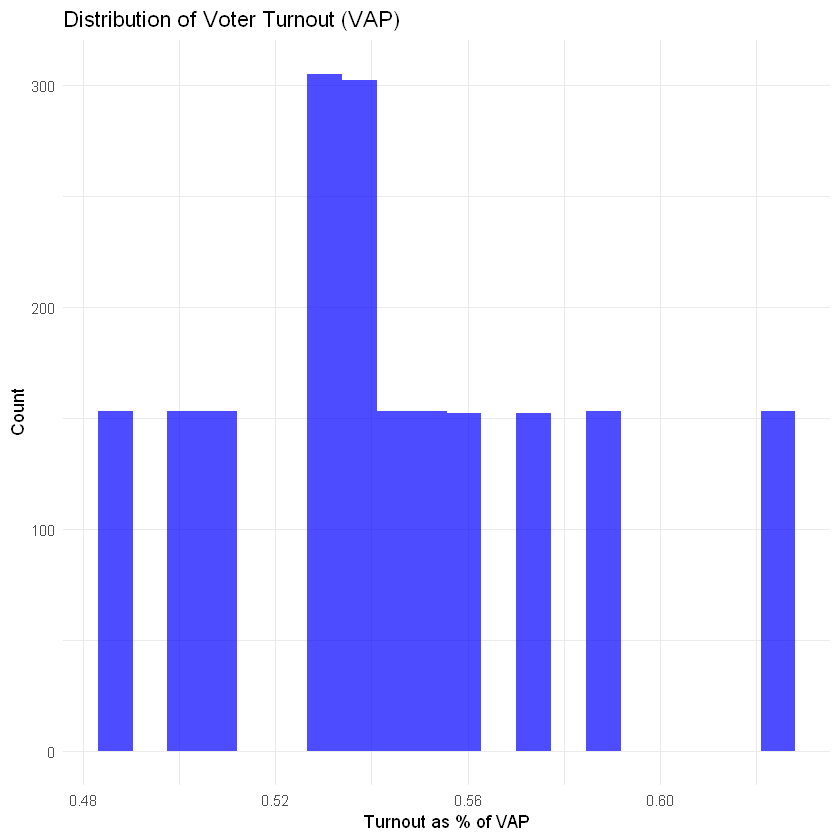

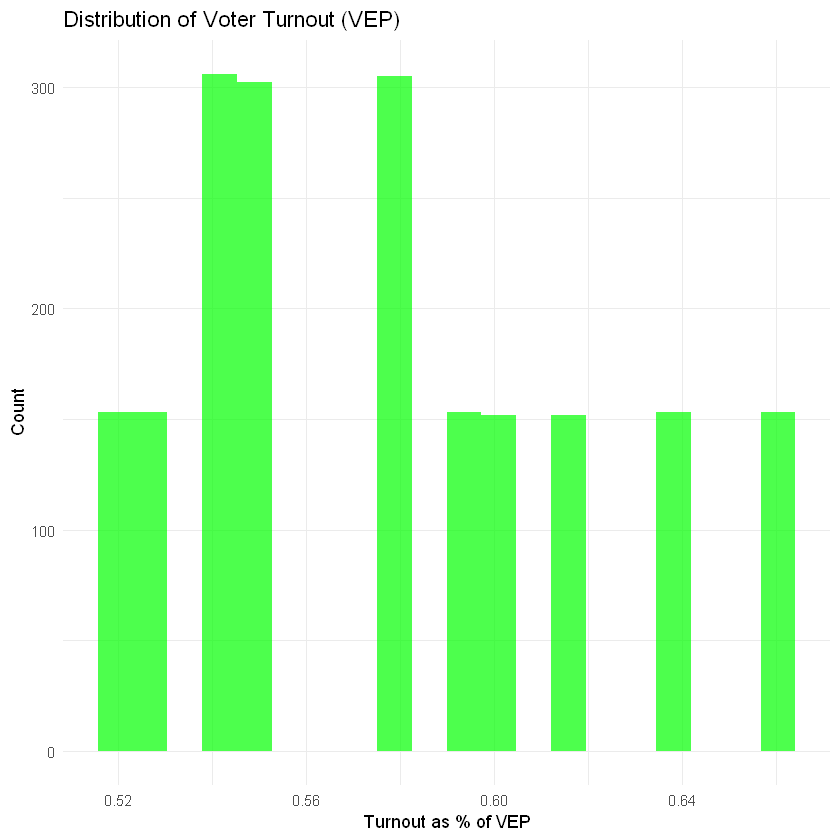

In [452]:
# Turnout as % of VAP
ggplot(final_merged_data, aes(x = Turnout_Percent_VAP)) +
  geom_histogram(bins = 20, fill = "blue", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Voter Turnout (VAP)",
       x = "Turnout as % of VAP", y = "Count")

# Turnout as % of VEP
ggplot(final_merged_data, aes(x = Turnout_Percent_VEP)) +
  geom_histogram(bins = 20, fill = "green", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Voter Turnout (VEP)",
       x = "Turnout as % of VEP", y = "Count")

#### Unique Parties and States

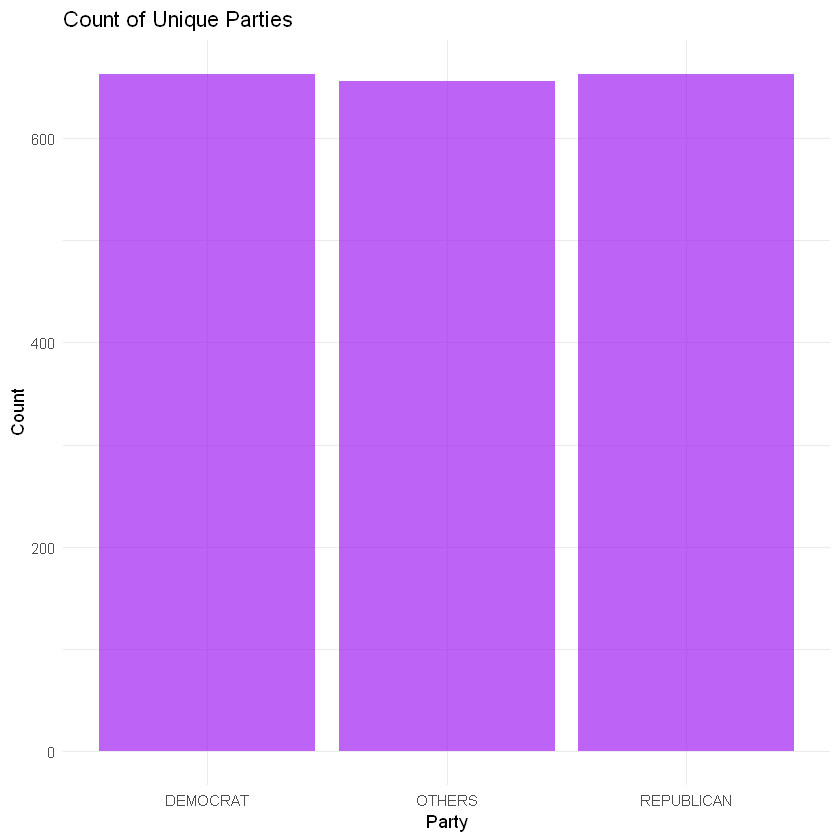

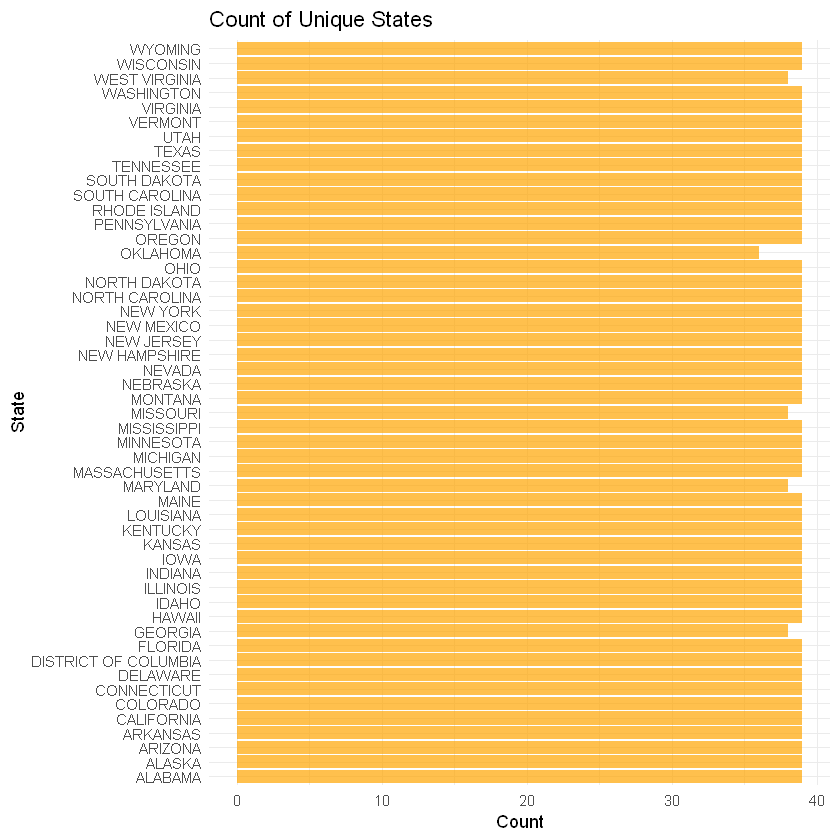

In [455]:
# Unique parties
ggplot(final_merged_data, aes(x = party_simplified)) +
  geom_bar(fill = "purple", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Count of Unique Parties", x = "Party", y = "Count")

# Unique states
ggplot(final_merged_data, aes(x = state)) +
  geom_bar(fill = "orange", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Count of Unique States", x = "State", y = "Count") +
  coord_flip()  # Flip for better readability

#### Total Votes Per State

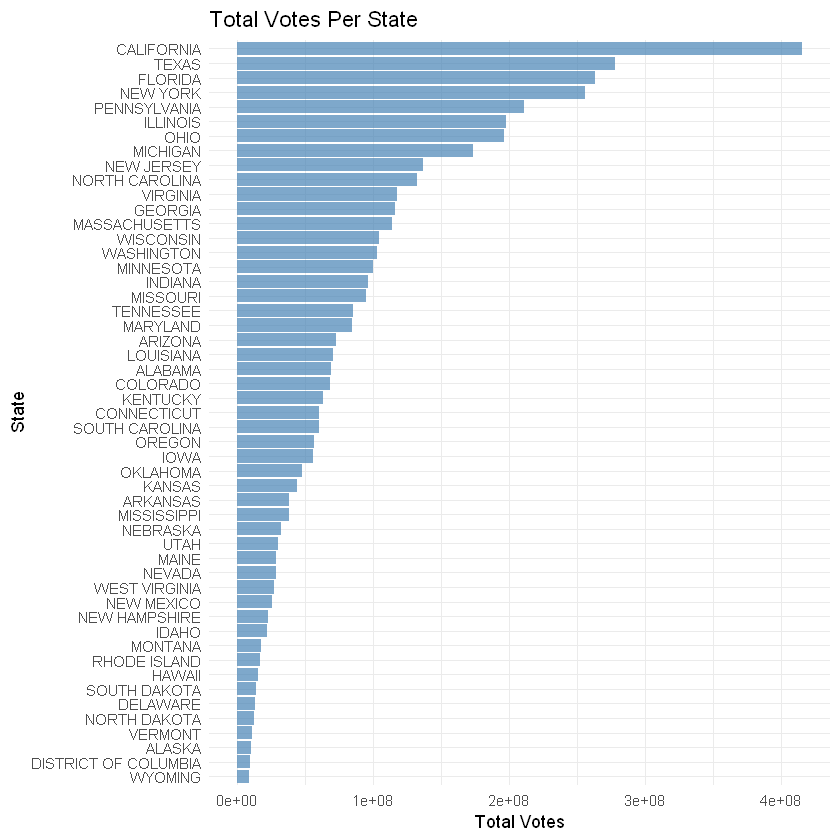

In [458]:
# Total votes per state
total_votes_per_state <- final_merged_data %>%
  group_by(state) %>%
  summarise(total_votes = sum(totalvotes, na.rm = TRUE))

ggplot(total_votes_per_state, aes(x = reorder(state, total_votes), y = total_votes)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Total Votes Per State", x = "State", y = "Total Votes") +
  coord_flip()

#### Turnout Trends Over Time (VAP and VEP)

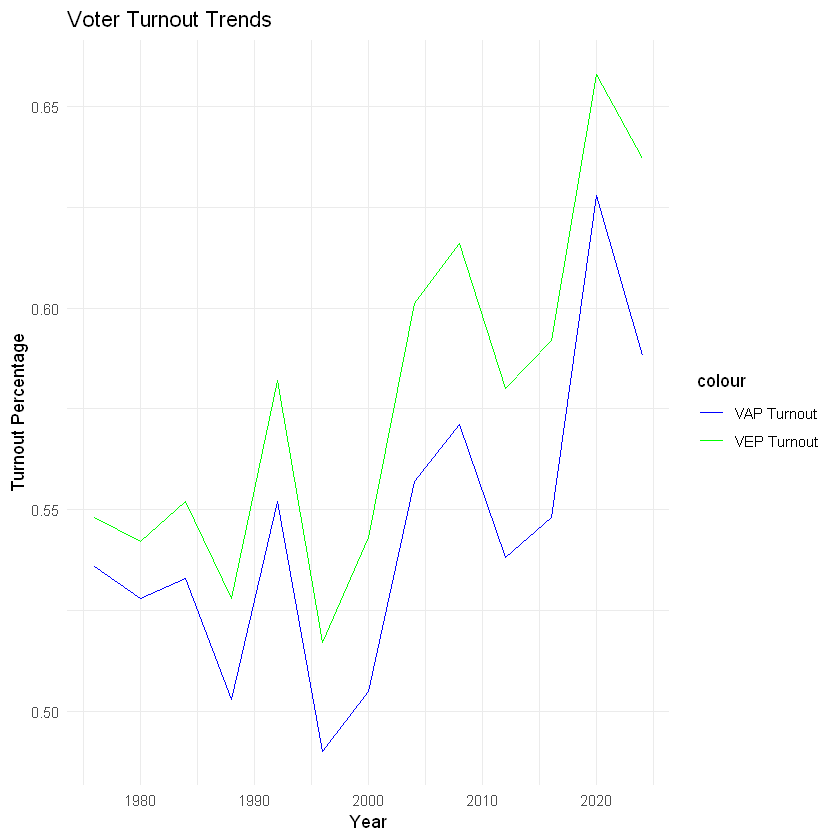

In [461]:
# Turnout Trends Over Time (VAP and VEP)
ggplot(final_merged_data, aes(x = year)) +
  geom_line(aes(y = Turnout_Percent_VAP, color = "VAP Turnout")) +
  geom_line(aes(y = Turnout_Percent_VEP, color = "VEP Turnout")) +
  labs(title = "Voter Turnout Trends", x = "Year", y = "Turnout Percentage") +
  scale_color_manual(values = c("VAP Turnout" = "blue", "VEP Turnout" = "green")) +
  theme_minimal()

### 2.2 Data visualization

##### Line Plot of Party Dominance Over Time

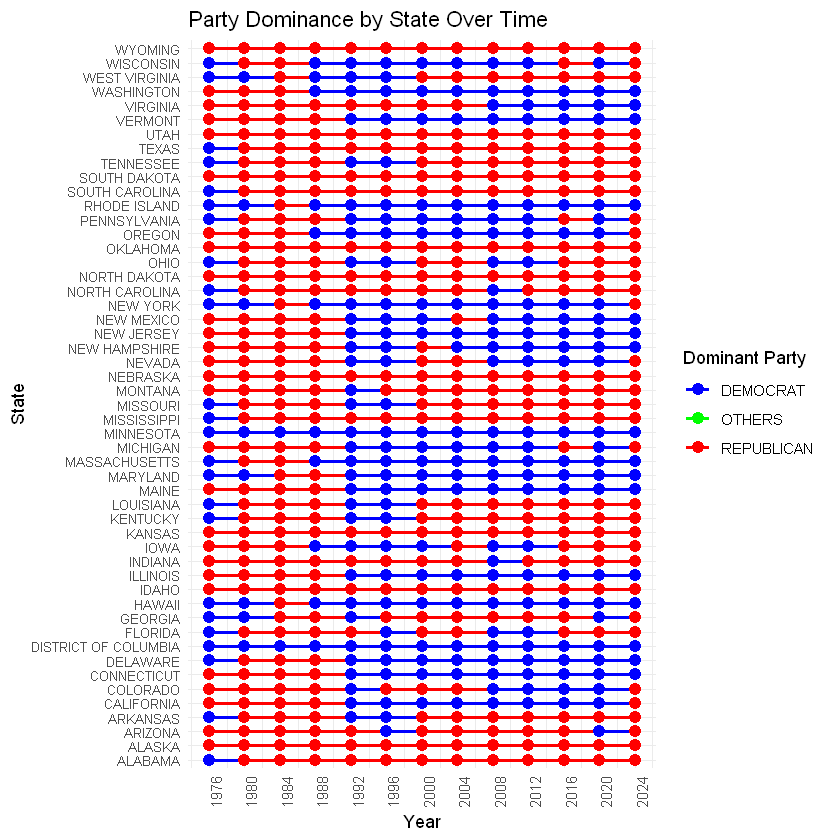

In [465]:
# Determine the dominant party for each state per year
state_party_dominance <- final_merged_data %>%
  group_by(year, state) %>%
  filter(candidatevotes == max(candidatevotes)) %>%
  select(year, state, party_simplified) %>%
  ungroup()  # Ungroup after summarizing

# Create a line plot showing party dominance over time for each state
ggplot(state_party_dominance, aes(x = year, y = state, color = party_simplified, group = state)) +
  geom_line(size = 1) +  # Add lines connecting the points for each state
  geom_point(size = 3) +  # Add points for each year-state
  scale_color_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red", "OTHERS" = "green")) +  # Set colors
  labs(title = "Party Dominance by State Over Time",
       x = "Year", y = "State", color = "Dominant Party") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),  # Rotate year labels
        axis.text.y = element_text(size = 8)) +  # Adjust state label size
  scale_x_continuous(breaks = seq(min(state_party_dominance$year), max(state_party_dominance$year), by = 4))  # Customize x-axis breakpoints

##### Heatmap of Party Dominance Over Time

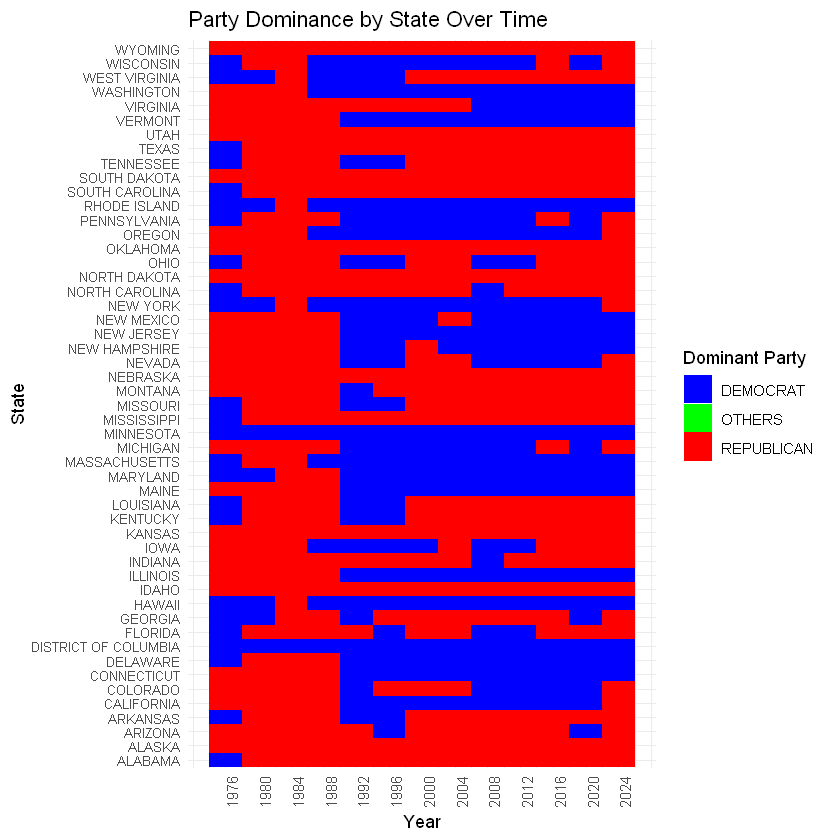

In [468]:
# Create a heatmap of party dominance over time
ggplot(state_party_dominance, aes(x = year, y = state, fill = party_simplified)) +
  geom_tile() +  # Fill the tiles with the party color
  scale_fill_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red", "OTHERS" = "green")) +  # Set colors
  labs(title = "Party Dominance by State Over Time",
       x = "Year", y = "State", fill = "Dominant Party") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),  # Rotate year labels for readability
        axis.text.y = element_text(size = 8)) +  # Reduce state label size if needed
  scale_x_continuous(breaks = seq(min(state_party_dominance$year), max(state_party_dominance$year), by = 4))  # Customize x-axis breakpoints

#### Average Turnout Over Time by Party

In [471]:
# Calculate total votes and turnout percentage by year and party
summary_stats <- final_merged_data %>%
  group_by(year, party_simplified) %>%
  summarize(
    total_votes = sum(candidatevotes, na.rm = TRUE),  # Sum candidatevotes for each year and party
    VEP_year = unique(VEP),                          # Extract unique VEP for the year
    avg_turnout = (total_votes / VEP_year)     # Compute turnout percentage
  )

# View corrected summary statistics
print(summary_stats)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 39 x 5
# Groups:   year [13]
    year party_simplified total_votes  VEP_year avg_turnout
   <dbl> <chr>                  <dbl>     <dbl>       <dbl>
 1  1976 DEMOCRAT            40680446 148911215     0.273  
 2  1976 OTHERS               2050005 148911215     0.0138 
 3  1976 REPUBLICAN          38870893 148911215     0.261  
 4  1980 DEMOCRAT            35480948 159635102     0.222  
 5  1980 OTHERS               7373264 159635102     0.0462 
 6  1980 REPUBLICAN          43642639 159635102     0.273  
 7  1984 DEMOCRAT            37449813 167701904     0.223  
 8  1984 OTHERS               1038219 167701904     0.00619
 9  1984 REPUBLICAN          54166829 167701904     0.323  
10  1988 DEMOCRAT            41716679 173579281     0.240  
# i 29 more rows


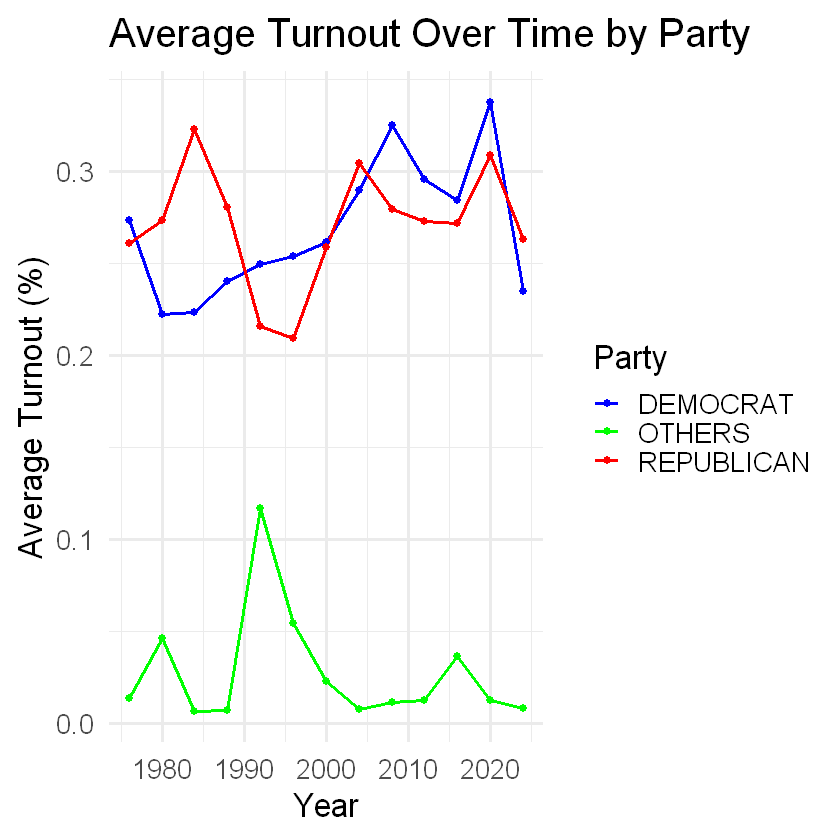

In [473]:
# Visualization: Time-Series Plot of Turnout Over Time
ggplot(summary_stats, aes(x = year, y = avg_turnout, color = party_simplified, group = party_simplified)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_color_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red", "OTHERS" = "green")) +
  labs(
    title = "Average Turnout Over Time by Party",
    x = "Year",
    y = "Average Turnout (%)",
    color = "Party"
  ) +
  theme_minimal(base_size = 20)

#### Vote Distribution by Party, by Year

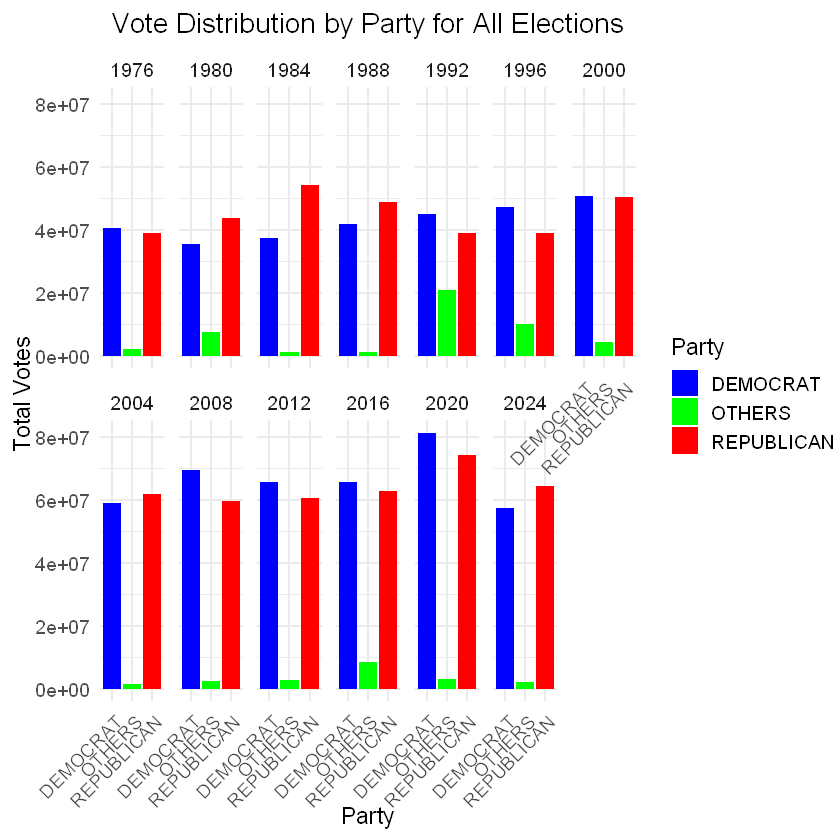

In [476]:
# Summarize data for all elections
votes_by_party_all_years <- final_merged_data %>%
  group_by(year, party_simplified) %>%
  summarize(total_votes = sum(candidatevotes, na.rm = TRUE), .groups = "drop")

# Create the grid of bar plots
plot <- ggplot(votes_by_party_all_years, aes(x = party_simplified, y = total_votes, fill = party_simplified)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ year, ncol = 7) +  
  scale_fill_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red", "OTHERS" = "green")) +
  labs(
    title = "Vote Distribution by Party for All Elections",
    x = "Party",
    y = "Total Votes",
    fill = "Party"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for readability
    plot.title = element_text(hjust = 0.5),            # Center the title
    panel.spacing = unit(0.6, "lines")                 # Adjust spacing between plots
  )

# Save or display the plot with a wide canvas for a rectangle
#ggsave("rectangular_all_elections_plot.png", plot = plot, width = 30, height = 10)  # Increase width for more columns
plot

#### Map of Party Dominance by State

##### Generating Static US Maps 

- plot_usmap(): Visualizes data on a US map, using data and values to determine state-level color values. https://www.rdocumentation.org/packages/usmap/versions/0.7.1/topics/plot_usmap

- scale_fill_manual(): Customizes fill colors for the map based on party dominance.

##### References:

- Zeileis, A., Hornik, K., & Murrell, P. (2009). Escaping RGBland: Selecting colors for statistical graphics. Computational Statistics & Data Analysis. https://www.zeileis.org/papers/Zeileis+Hornik+Murrell-2009.pdf

- USmap documentation: https://cran.r-project.org/web/packages/usmap/readme/README.html

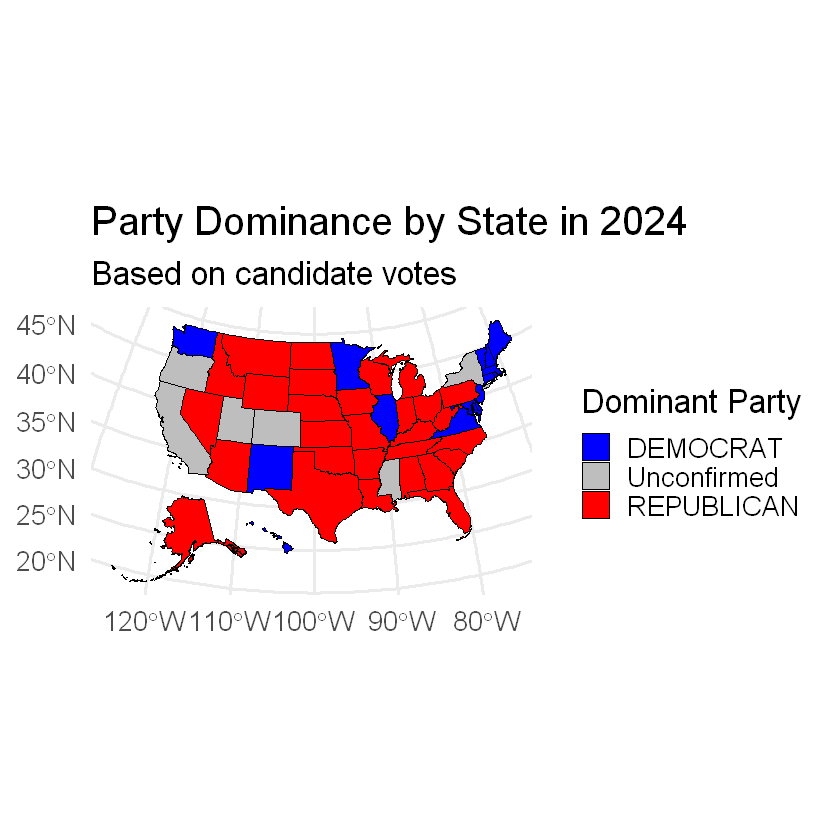

In [478]:
# Map of Party Dominance by State for a specific year (e.g., 2024)
specific_year <- 2024

# 1. Prepare the data
state_party_dominance <- final_merged_data %>%
  filter(year == specific_year) %>%
  group_by(state) %>%
  summarise(
    # Determine dominant party or unconfirmed state
    dominant_party = ifelse(all(candidatevotes == 0), "Unconfirmed", 
                            ifelse(all(party_simplified == "OTHERS" & candidatevotes == 0), "OTHERS", 
                                   party_simplified[which.max(candidatevotes)])),
    .groups = "drop"
  )

# 2. Handle the color assignment for each party and unconfirmed states
state_party_dominance <- state_party_dominance %>%
  mutate(
    party_color = case_when(
      dominant_party == "DEMOCRAT" ~ "blue",
      dominant_party == "REPUBLICAN" ~ "red",
      dominant_party == "OTHERS" ~ "green",  # Color "OTHERS" as green
      dominant_party == "Unconfirmed" ~ "grey",  # Color unconfirmed states as grey
      TRUE ~ "grey"  # Default to grey for any other case
    )
  )

# 3. Plot the map with custom labels for the legend
plot_usmap(data = state_party_dominance, regions = "states", values = "party_color") +
  scale_fill_manual(
    values = c("blue" = "blue", "red" = "red", "green" = "green", "grey" = "grey"),  # Custom color scale
    name = "Dominant Party",
    labels = c("DEMOCRAT", "Unconfirmed", "REPUBLICAN")  # Custom legend labels
  ) +
  labs(
    title = paste("Party Dominance by State in", specific_year),
    subtitle = "Based on candidate votes"
  ) +
  theme_minimal(base_size = 20)

#### Interactive Map of Party Dominance by State, by Year

##### Making Interactive Plots with Plotly
- ggplotly(): Converts a ggplot2 object into an interactive plotly object. Plotly for R Documentation.
##### References:
- Sievert, C. (2020). Interactive Web-Based Data Visualization with R, plotly, and shiny. https://plotly-r.com

The code filters the dataset to the year of interest (filter(year == year_selected)), creates a static US map using plot_usmap(), and enhances it with ggplot2. Finally, ggplotly() transforms the static map into an interactive visualization. The interactivity in the Shiny app is controlled by user input through a slider for selecting years.

In [301]:
# Example data with state, year, and dominant party
state_party_dominance <- final_merged_data %>%
  group_by(year, state) %>%
  filter(candidatevotes == max(candidatevotes)) %>%
  select(year, state, party_simplified) %>%
  ungroup()

# Map party dominance to color
state_party_dominance <- state_party_dominance %>%
  mutate(
    party_color = case_when(
      party_simplified == "DEMOCRAT" ~ "blue",
      party_simplified == "REPUBLICAN" ~ "red",
      TRUE ~ "green"  # "OTHERS" or any other case
    )
  )

#state_party_dominance

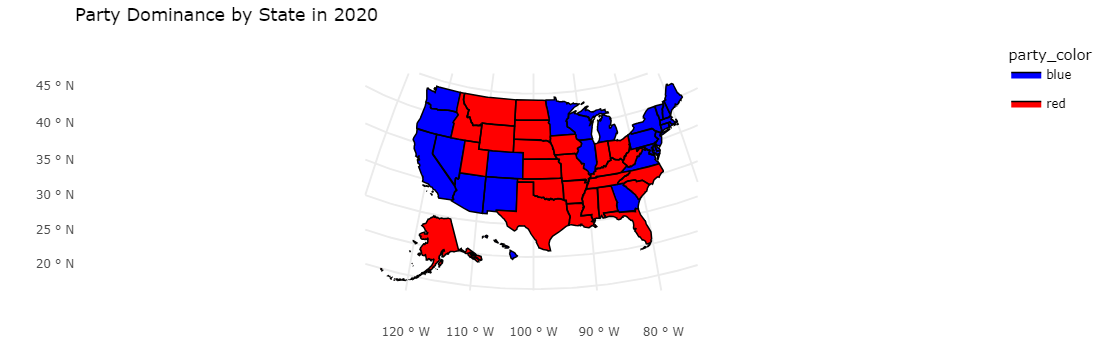

In [303]:
# Filter the data for the specific year (e.g., 2020)
year_selected <- 2020  

state_party_dominance_2020 <- state_party_dominance %>%
  filter(year == year_selected)

# Create the plot
map <- plot_usmap(data = state_party_dominance_2020, 
                  values = "party_color", 
                  regions = "states") +
  scale_fill_manual(values = c("blue" = "blue", "red" = "red", "green" = "green")) +
  theme_minimal() +
  labs(title = paste("Party Dominance by State in", year_selected))

# Make the plot interactive
interactive_map <- ggplotly(map)

# Show the plot
interactive_map

#### IMPORTANT NOTE:
##### The following code creates an interactive Shiny app for visualizing the US map of party dominance over time. 
##### While the code works in a standalone R environment like RStudio or when saved and run as a separate app.R file,
##### attempting to execute it within a Jupyter Notebook (R Kernel) often results in the kernel entering an "unknown" or "stuck" state.
##### This issue is due to limitations of Jupyter's handling of interactive R Shiny apps.

##### If the kernel crashes or gets stuck:
##### 1. Restart the Jupyter kernel.
##### 2. Close and relaunch the notebook to resume working.

##### To avoid this, consider running the app in a dedicated R environment outside Jupyter. For example:
##### - Save the Shiny app code to a file named app.R and run it using RStudio.
##### - Alternatively, use the `Rscript` command in the terminal to execute the app.R file.

##### This limitation is specific to Jupyter and does not affect standalone execution in other environments.

- Shiny by RStudio (Official Documentation):  https://shiny.rstudio.com/
- Plotly for R (Official Documentation):  https://plotly.com/r/

In [ ]:
# Save the shiny app code to a file called app.R
#app_code <- '
# Extract unique election years from the data
election_years <- unique(state_party_dominance$year)

ui <- fluidPage(
  titlePanel("Interactive US Map of Party Dominance Over Time"),
  sidebarLayout(
    sidebarPanel(
      sliderInput("year", "Select Year:", min = min(election_years), 
                  max = max(election_years), value = max(election_years), step = 1,
                  animate = animationOptions(interval = 1000, loop = FALSE))
    ),
    mainPanel(
      plotlyOutput("us_map")
    )
  )
)

server <- function(input, output) {
  
  # Render map based on the selected year
  output$us_map <- renderPlotly({
    year_selected <- input$year  # Get selected year
    
    state_party_dominance_year <- state_party_dominance %>%
      filter(year == year_selected)
    
    map <- plot_usmap(data = state_party_dominance_year, 
                      values = "party_color", 
                      regions = "states") +
      scale_fill_manual(values = c("blue" = "blue", "red" = "red", "green" = "green", "grey" = "grey")) +
      theme_minimal() +
      labs(title = paste("Party Dominance by State in", year_selected),
           fill = "Party")
    
    ggplotly(map)
  })
  
}

# Run the app
shinyApp(ui = ui, server = server)
#'

# Write the Shiny app code to app.R
#writeLines(app_code, "app.R")

Warning message:
"Unknown or uninitialised column: `year`."
Warning message in min(election_years):
"no non-missing arguments to min; returning Inf"
Warning message in max(election_years):
"no non-missing arguments to max; returning -Inf"
Warning message in max(election_years):
"no non-missing arguments to max; returning -Inf"
Warning message:
"In sliderInput(): `value` should be greater than or equal to `min` (value = -Inf, min = Inf)."

Listening on http://127.0.0.1:3805



In [ ]:
#shiny::runApp("app.R")

# Part 3

## 3. Data manipulation to obtain subsets and extract detailed information

### 3.1 Creating a subset for years 2020-2024 merging demographic data

#### Limitations of Finding Free Demographic Data at the State Level: #### 
In this project, we encountered a challenge when trying to obtain demographic data at the state level. The ideal data for our analysis would include demographic breakdowns (e.g., by race, gender, income, etc.) for each state in a format that could be easily extracted and analyzed, such as CSV or TXT files. Unfortunately, the data we sought—especially granular demographic breakdowns by state—was not readily available in a user-friendly format that could be easily retrieved from websites or public databases.

While there are sources that provide state-level demographic data, they often exist in more complex formats, such as interactive dashboards or PDFs, which are harder to parse into structured datasets. Additionally, many sources that offer such data do so in aggregated forms that lack the fine-grained, party-specific demographic breakdowns necessary for meaningful comparison.

As a result, our approach is based on combining available national-level data with state-level election results. This method, while suboptimal, allows us to continue the analysis and draw insights from the available data, albeit with some limitations in the level of detail we can work with for state-level demographics.

Had we been able to acquire more granular demographic data at the state level in an easily accessible format, the merging process would have been more straightforward, and the comparisons between states and parties could have been more detailed and precise.

#### 3.1.1 Read 2020 demographic data

In [888]:
# Specify the URL
url <- "https://en.wikipedia.org/wiki/2020_United_States_presidential_election"

# Read the webpage content
page <- read_html(url)

# Extract the tables on the page
tables <- html_table(page, fill = TRUE)

# Select the table 
demo_2020 <- tables[[31]]  # Index of the table needed

# Display the first few rows
#demo_2020

#### 3.1.2 Inspect 2020 demographic data

In [782]:
#unique(demo_2020$"Demographic subgroup")

#### 3.1.3 Clean 2020 demographic data

In [1212]:
# Create a new column as the first column, propagating section headers
demo_2020_cleaned <- demo_2020 %>%
  mutate(
    category = if_else(
      !str_detect(.[[2]], "\\d+"),  # Check if the 2nd column contains non-numeric data
      `Demographic subgroup`,      # Assign section header to `category`
      NA_character_
    )
  ) %>%
  fill(category, .direction = "down") %>%  # Fill down the `category`
  relocate(category, .before = `Demographic subgroup`)  # Move `category` as the first column

# Filter rows with numerical data only
demo_2020_cleaned <- demo_2020_cleaned %>%
  filter(str_detect(.[[3]], "\\d+"))  # Keep rows where the 3rd column has numbers

# Drop first row
demo_2020_cleaned <- demo_2020_cleaned %>%
  slice(-1)  # Removes the first row

# Convert the last three columns to numeric values
demo_2020_cleaned <- demo_2020_cleaned %>%
  mutate(
    # Convert the last three columns to numeric based on their positions (3rd, 4th, and 5th columns)
    across(
      .cols = tail(names(demo_2020_cleaned), 3),  # Select the last 3 columns by their name
      .fns = ~ as.numeric(.)
    )
  )

# Rename the columns names
demo_2020_cleaned <- demo_2020_cleaned %>%
  rename(
    DEMOCRAT = `Biden`,
    REPUBLICAN = `Trump`
  )

# Clean 2020 demographic data by replacing 'None' with 'No religious affiliation'
demo_2020_cleaned <- demo_2020_cleaned %>%
  mutate(`Demographic subgroup` = if_else(`Demographic subgroup` == "None", "No religious affiliation", `Demographic subgroup`))

#demo_2020_cleaned

#### 3.2.1 Read 2024 demographic data

In [1214]:
# Specify the URL
url <- "https://en.wikipedia.org/wiki/2024_United_States_presidential_election"

# Read the webpage content
page <- read_html(url)

# Extract the tables on the page
tables <- html_table(page, fill = TRUE)

# Select the table 
demo_2024 <- tables[[27]]  # Index of the table needed

# Display the first few rows
#demo_2024

#### 3.2.2 Inspect 2024 demographic data

In [1208]:
#unique(demo_2024$"Demographic subgroup")

#### 3.2.3 Clean 2024 demographic data

In [1216]:
# Correct rename for 'Trump' and 'Harris'
demo_2024_cleaned <- demo_2024 %>%
  rename(
    REPUBLICAN = `Trump`,
    DEMOCRAT = `Harris`
  )

# Create a new column 'category' that propagates section headers
demo_2024_cleaned <- demo_2024_cleaned %>%
  mutate(
    category = if_else(
      !str_detect(.[[2]], "\\d+"),  # Check if the 2nd column contains non-numeric data
      `Demographic subgroup`,      # Assign section header to `category`
      NA_character_
    )
  ) %>%
  fill(category, .direction = "down") %>%  # Fill down the `category`
  relocate(category, .before = `Demographic subgroup`)  # Move `category` as the first column

# Filter rows to keep only rows with numerical data in the relevant columns
demo_2024_cleaned <- demo_2024_cleaned %>%
  filter(str_detect(.[[3]], "\\d+"))  # Keep rows where the 3rd column (REPUBLICAN) has numbers

# Convert the relevant columns to numeric values
demo_2024_cleaned <- demo_2024_cleaned %>%
  mutate(
    across(
      .cols = c(REPUBLICAN, DEMOCRAT, `% oftotal vote`),  # Use `% oftotal vote` explicitly
      .fns = ~ as.numeric(.)
    )
  )

# Adjust the 'Abortion should be' category to combine the subgroups (Legal and Illegal cases)
demo_2024_cleaned <- demo_2024_cleaned %>%
  mutate(
    `Demographic subgroup` = case_when(
      `Demographic subgroup` %in% c("Legal in all cases", "Legal in most cases") ~ "Legal in all/most cases",
      `Demographic subgroup` %in% c("Illegal in most cases", "Illegal in all cases") ~ "Illegal in all/most cases",
      TRUE ~ `Demographic subgroup`
    )
  ) %>%
  group_by(category, `Demographic subgroup`) %>%
  summarise(
    REPUBLICAN = mean(REPUBLICAN, na.rm = TRUE),  # Average for REPUBLICAN
    DEMOCRAT = mean(DEMOCRAT, na.rm = TRUE),      # Average for DEMOCRAT
    `% oftotal vote` = sum(`% oftotal vote`, na.rm = TRUE),  # Use `% oftotal vote` explicitly for the sum
    .groups = "drop"
  )

# Check the result
#demo_2024_cleaned

### 3.3 Find matching subgroups in the demographic data and select them

In [1218]:
# Get the unique values of the "category" column from both datasets
unique_demo_2020 <- unique(demo_2020_cleaned$`category`)
unique_demo_2024 <- unique(demo_2024_cleaned$`category`)

# Find the common subgroups (match)
common_subgroups <- intersect(unique_demo_2020, unique_demo_2024)
print("Common Subgroups:")
print(common_subgroups)

[1] "Common Subgroups:"
 [1] "Ideology"                           "Party"                             
 [3] "Gender"                             "Marital status"                    
 [5] "Gender by marital status"           "Race/ethnicity"                    
 [7] "Gender by race/ethnicity"           "Religion"                          
 [9] "Age"                                "Age by race"                       
[11] "Sexual orientation"                 "First time voter"                  
[13] "Education"                          "Education by race"                 
[15] "Education by race/gender"           "Income"                            
[17] "Union households"                   "Military service"                  
[19] "Issue regarded as most important"   "Region"                            
[21] "Area type"                          "Family's financial situation today"
[23] "Abortion should be"                


In [1220]:
# Get the common categories
common_subgroups <- intersect(unique_demo_2020, unique_demo_2024)

# Drop the rows in demo_2020_cleaned and demo_2024_cleaned that don't match the common categories
demo_2020_filtered <- demo_2020_cleaned %>%
  filter(`category` %in% common_subgroups)

demo_2024_filtered <- demo_2024_cleaned %>%
  filter(`category` %in% common_subgroups)

# Check the unique categories in both datasets after filtering
#unique(demo_2020_filtered$category)
#unique(demo_2024_filtered$category)

### 3.4 Mege the 2 demographic datasets

In [1240]:
# Add a 'year' column to each dataset
final_demo_2020_cleaned <- demo_2020_filtered %>%
  mutate(year = 2020)  # Assign year 2020 to the 2020 dataset

final_demo_2024_cleaned <- demo_2024_filtered %>%
  mutate(year = 2024)  # Assign year 2024 to the 2024 dataset

# Merge the datasets (stack them vertically)
combined_data <- bind_rows(final_demo_2020_cleaned, final_demo_2024_cleaned)

# View the combined dataset
#head(combined_data,5)
#tail(combined_data,5)

Pivoting the data serves a crucial role in transforming the demographic data into a more analyzable and comparable format for the purposes of this project. 

Pivoting reorganizes the data to make it more suitable for analysis and visualization. The original demographic dataset has Demographic Subgroup values as rows, with their corresponding percentages under columns like Democrat and Republican. To compare this data with election results, we need to:

- Reshape the data so that Democrat and Republican become part of the rows (e.g., one row per combination of year, category, subgroup, and party).
- Make the corresponding percentage values a single column (e.g., support_percentage).


Pivoting makes it easier to:
- Compare trends across elections (2020 vs. 2024).
- Combine demographic data with the election dataset, which is structured with party support as rows.

In [1279]:
# Filter to keep only the specified categories
categories_to_keep <- c("Ideology", "Gender", "Gender by marital status", 
                        "Religion", "Age", "Education", "Income", 
                        "Area type", "Abortion should be")

filtered_data <- combined_data %>%
  filter(category %in% categories_to_keep)

# Pivot the 'DEMOCRAT' and 'REPUBLICAN' columns into rows
combined_data_long <- filtered_data %>%
  pivot_longer(
    cols = c("DEMOCRAT", "REPUBLICAN"),  # These columns will be turned into rows
    names_to = "party",  # The new column to hold 'DEMOCRAT' or 'REPUBLICAN'
    values_to = "vote_percentage"  # The new column for vote percentage
  )

# Check the transformed data
#head(combined_data_long, 40)
#tail(combined_data_long, 40)

In [1277]:
# Specify the category order
category_order <- c("Ideology", "Gender", "Gender by marital status", 
                    "Religion", "Age", "Education", "Income", 
                    "Area type", "Abortion should be")

# Reorder the columns: 'year' as the first, 'party' as the second
# Then order the rows so that 'category' matches the specified order
final_merged_demo <- combined_data_long %>%
  mutate(
    category = factor(category, levels = category_order)  # Convert category to a factor with the desired order
  ) %>%
  arrange(year, category, party) %>%  # Arrange rows by year, category (in the specified order), and party
  select(year, party, everything())  # Reorder columns to move 'year' and 'party' to the first positions

# View the transformed dataset
#head(final_merged_demo,20)
#tail(final_merged_demo,20)

# Check rows where category is 'Ideology'
ideology_rows <- final_merged_demo %>%
  filter(category == "Ideology")

# View the filtered rows
ideology_rows

year party      category Demographic subgroup % oftotal vote vote_percentage
1  2020 DEMOCRAT   Ideology Liberals             24             89             
2  2020 DEMOCRAT   Ideology Moderates            38             64             
3  2020 DEMOCRAT   Ideology Conservatives        38             14             
4  2020 REPUBLICAN Ideology Liberals             24             10             
5  2020 REPUBLICAN Ideology Moderates            38             34             
6  2020 REPUBLICAN Ideology Conservatives        38             85             
7  2024 DEMOCRAT   Ideology Conservatives        34              9             
8  2024 DEMOCRAT   Ideology Liberals             23             91             
9  2024 DEMOCRAT   Ideology Moderates            42             57             
10 2024 REPUBLICAN Ideology Conservatives        34             90             
11 2024 REPUBLICAN Ideology Liberals             23              7             
12 2024 REPUBLICAN Ideology Moderates            42             40

In [1161]:
# This code checks whether the number of rows in the final_merged_demo dataset is equal to the number of unique values in the Demographic subgroup column, multiplied by 2 (for the two parties: DEMOCRAT and REPUBLICAN), and further multiplied by 2 (for the two years: 2020 and 2024).
#nrow(final_merged_demo)
#length(unique(final_merged_demo$`Demographic subgroup`))
# Check for rows where 'Demographic subgroup' is 'None'
#none_rows <- final_merged_demo %>%
#  filter(`Demographic subgroup` == "None")

### 3.5 Create a national aggregate in final_merged_data and merge with the demographic data

#### Preserving State-Level Details and Adding National Aggregates: ####
The demographic data is only available at the national level, which limits direct comparisons with detailed state-level election results. To address this, we retained the original state-level data while creating a national aggregate. This aggregated version combines votes from all states for each party and election year, ensuring compatibility with the national-level demographic data.

By merging the demographic data with the aggregated election data, we maintain a coherent dataset for analyzing trends at the national level. Meanwhile, the detailed state-level data remains intact for future analyses or for use with more granular demographic data if it becomes available.

This dual approach allows for:

- Comprehensive Analysis: The national aggregation provides insights into overall trends, enabling comparisons with demographic data.
- Data Integrity: Retaining state-level data preserves the richness of the dataset and supports exploratory analyses that might benefit from granular details.

In [1163]:
# Add national-level aggregated data to the election dataset
merged_data_national <- final_merged_data %>%
  filter(year %in% c(2020, 2024)) %>%  # Select only the years 2020 and 2024
  filter(party_simplified %in% c("DEMOCRAT", "REPUBLICAN")) %>%  # Keep only DEMOCRAT and REPUBLICAN
  group_by(year, party_simplified) %>%  # Group by year and party
  summarise(
    candidatevotes = sum(candidatevotes, na.rm = TRUE),
    totalvotes = sum(totalvotes, na.rm = TRUE),
    VAP = sum(VAP, na.rm = TRUE),  # Aggregate VAP
    VEP = sum(VEP, na.rm = TRUE),  # Aggregate VEP
    Turnout = sum(Turnout, na.rm = TRUE),  # Sum raw turnout
    Turnout_Percent_VAP = (sum(Turnout, na.rm = TRUE) / sum(VAP, na.rm = TRUE)),  # Recalculate turnout percentage (VAP)
    Turnout_Percent_VEP = (sum(Turnout, na.rm = TRUE) / sum(VEP, na.rm = TRUE)),  # Recalculate turnout percentage (VEP)
    .groups = "drop"
  ) %>%
  mutate(
    state = "NATIONAL",  # Add placeholder for national-level aggregation
    Turnout_Percent_VAP = round(Turnout_Percent_VAP, 2),  # Round Turnout_Percent_VAP to 2 decimal places
    Turnout_Percent_VEP = round(Turnout_Percent_VEP, 2)   # Round Turnout_Percent_VEP to 2 decimal places
  ) %>%
  bind_rows(
    final_merged_data %>% filter(year %in% c(2020, 2024))  # Re-add filtered state-level data
  ) %>%
  select(-state_po)  # Drop the state_po column

# View the updated dataset
#head(merged_data_national)

In [1165]:
# Merge the pivoted demographic data with the election data
final_merged_data_with_demo_national <- merged_data_national %>%
  inner_join(
    final_merged_demo,  # Pivoted demographic data
    by = c("year", "party_simplified" = "party")
  ) %>%
  mutate(
    # Only fill demographic columns for "NATIONAL" state
    across(starts_with("Demographic"), ~ ifelse(state == "NATIONAL", ., NA_real_))  # Replace demographic columns with NA where state is not NATIONAL
  ) %>%
  mutate(
    state = factor(state, levels = c("NATIONAL", sort(unique(state[state != "NATIONAL"]))))
  ) %>%
  arrange(state, year, category, party_simplified)  # Order rows by state, year, category, and party

# Divide numerical values in the last 2 columns by 100 and round to two decimals
final_merged_data_with_demo_national <- final_merged_data_with_demo_national %>%
  mutate(
    across(
      .cols = tail(names(final_merged_data_with_demo_national), 2),  # Select the last 2 columns
      .fns = ~ round(. / 100, 2)  # Divide by 100 and round to 2 decimal places
    )
  )

# View the updated data
final_merged_data_with_demo_national

Warning message in inner_join(., final_merged_demo, by = c("year", party_simplified = "party")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 1 of `x` matches multiple rows in `y`.
i Row 1 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


year party_simplified candidatevotes totalvotes VAP         VEP        
1    2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
2    2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
3    2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
4    2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
5    2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
6    2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
7    2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
8    2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
9    2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
10   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
11   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
12   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
13   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
14   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
15   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
16   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
17   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
18   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
19   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
20   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
21   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
22   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
23   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
24   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
25   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
26   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
27   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
28   2020 REPUBLICAN       74216146       158528503  12865974000 12272050593
29   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
30   2020 DEMOCRAT         81268908       158528503  12865974000 12272050593
...  ...  ...              ...            ...        ...         ...        
7251 2024 DEMOCRAT          69508         266275     264798961   244666890  
7252 2024 DEMOCRAT          69508         266275     264798961   244666890  
7253 2024 DEMOCRAT          69508         266275     264798961   244666890  
7254 2024 DEMOCRAT          69508         266275     264798961   244666890  
7255 2024 DEMOCRAT          69508         266275     264798961   244666890  
7256 2024 REPUBLICAN       192576         266275     264798961   244666890  
7257 2024 REPUBLICAN       192576         266275     264798961   244666890  
7258 2024 REPUBLICAN       192576         266275     264798961   244666890  
7259 2024 REPUBLICAN       192576         266275     264798961   244666890  
7260 2024 REPUBLICAN       192576         266275     264798961   244666890  
7261 2024 DEMOCRAT          69508         266275     264798961   244666890  
7262 2024 DEMOCRAT          69508         266275     264798961   244666890  
7263 2024 DEMOCRAT          69508         266275     264798961   244666890  
7264 2024 DEMOCRAT          69508         266275     264798961   244666890  
7265 2024 DEMOCRAT          69508         266275     264798961   244666890  
7266 2024 REPUBLICAN       192576         266275     264798961   244666890  
7267 2024 REPUBLICAN       192576         266275     264798961   244666890  
7268 2024 REPUBLICAN       192576         266275     264798961   244666890  
7269 2024 REPUBLICAN       192576         266275     264798961   244666890  
7270 2024 REPUBLICAN       192576         266275     264798961   244666890  
7

##### 3.5.1 Download the combined final merged dataset

In [1168]:
write.csv(final_merged_data_with_demo_national, "final_merged_data_with_demo_national.csv", row.names = FALSE, fileEncoding = "UTF-8")

### 3.2 National Demographics (2020 vs. 2024)

Voter demographics (e.g., gender, age, race, education) affected election outcomes on a national level. Analyzing the impact of demographic shifts can provide insights into voter behavior.

Exit polls are surveys conducted with voters as they leave polling stations, providing valuable insights into how different demographic groups voted. They typically capture data on categories like Income, Education, Age, Gender, and Political Views, helping analysts understand voting patterns. 

By comparing these demographics across elections (e.g., 2020 and 2024), we can identify shifts in voter behavior. While exit polls are not without limitations (e.g., sampling bias), they offer key insights into how specific groups voted, guiding campaign strategies and predicting election outcomes.

In [1172]:
# Inspect column names to ensure correct mapping
#colnames(final_merged_data_with_demo_national)

In [1174]:
#unique(final_merged_data_with_demo_national$category)
#unique(final_merged_data_with_demo_national$"Demographic subgroup")

In [1176]:
# List of categories to loop through
categories <- c("Ideology", "Gender", "Gender by marital status", "Religion", "Age", 
                "Education", "Income", "Area type", "Abortion should be")

# Create empty lists to store results
data_list <- list()
plot_list <- list()

# Loop over each category and perform the operations
for (category_filter in categories) {
  
  # Filter and calculate the change in vote percentage for the specified category
  party_comparison <- final_merged_data_with_demo_national %>%
    filter(year %in% c(2020, 2024), party_simplified %in% c("DEMOCRAT", "REPUBLICAN")) %>%
    filter(category == category_filter) %>%
    filter(!is.na(`Demographic subgroup`)) %>%  # Drop rows where Demographic subgroup is NA
    group_by(category, `Demographic subgroup`, year, party_simplified) %>%
    summarise(
      avg_vote_percentage = mean(vote_percentage, na.rm = TRUE),  # Use vote percentage directly
      .groups = 'drop'
    ) %>%
    pivot_wider(names_from = year, values_from = avg_vote_percentage) %>%
    mutate(
      shift = `2024` - `2020`  # Calculate the shift in vote percentage
    )
  
  # Store the result dataframe in the list with the category name as the key
  data_list[[category_filter]] <- party_comparison
  
  # Plot for the shift in vote percentage (2024 - 2020) for each party
  plot <- ggplot(party_comparison, aes(x = shift, y = `Demographic subgroup`, color = party_simplified, fill = party_simplified)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7, color = "black") +
    scale_fill_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red")) +  # Set specific colors for parties
    scale_color_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red")) +  # Set specific colors for parties
    labs(
      title = paste("Shift in Vote Percentage (2024 - 2020) by", category_filter),
      x = "Shift in Vote Percentage",
      y = category_filter, 
      fill = "Party",
      color = "Party"
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels if needed
    geom_vline(xintercept = 0, linetype = "dashed", color = "black")  # Add a vertical line at x = 0 for reference
  
  # Store the plot in the list with the category name as the key
  plot_list[[category_filter]] <- plot
}

# Now we can access the results for each category in the next sessions. 

In [1178]:
# Lollipop plot for shift in vote percentage (2024 - 2020)
#ggplot(party_comparison_Ideology, aes(x = shift, y = `Demographic subgroup`, color = party_simplified)) +
#  geom_segment(aes(x = 0, xend = shift, y = `Demographic subgroup`, yend = `Demographic subgroup`), size = 2) +  # Lines representing the shift
#  geom_point(aes(x = shift, y = `Demographic subgroup`), size = 3, shape = 16) +  # Points at the end of the lines
#  scale_color_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red")) +  # Set specific colors for parties
#  labs(
#    title = "Shift in Vote Percentage (2024 - 2020) by Demographic Subgroup",
#    x = "Shift in Vote Percentage",
#    y = "Demographic Subgroup",
#    color = "Party"
#  ) +
#  theme_minimal() +
#  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels if needed
#  geom_vline(xintercept = 0, linetype = "dashed", color = "black")  # Vertical dashed line at 0

#### 3.2.1 How did the Democratic and Republican vote percentages change by Ideology from 2020 to 2024?

We'll calculate the shift in vote percentage for Democrats and Republicans in 2020 and 2024 within the Ideology category (for the subgroups Liberals, Moderates, and Conservatives).

# A tibble: 6 x 6
  category `Demographic subgroup` party_simplified `2020` `2024`   shift
  <fct>    <chr>                  <chr>             <dbl>  <dbl>   <dbl>
1 Ideology Conservatives          DEMOCRAT           0.14   0.09 -0.05  
2 Ideology Conservatives          REPUBLICAN         0.85   0.9   0.0500
3 Ideology Liberals               DEMOCRAT           0.89   0.91  0.0200
4 Ideology Liberals               REPUBLICAN         0.1    0.07 -0.03  
5 Ideology Moderates              DEMOCRAT           0.64   0.57 -0.0700
6 Ideology Moderates              REPUBLICAN         0.34   0.4   0.06  


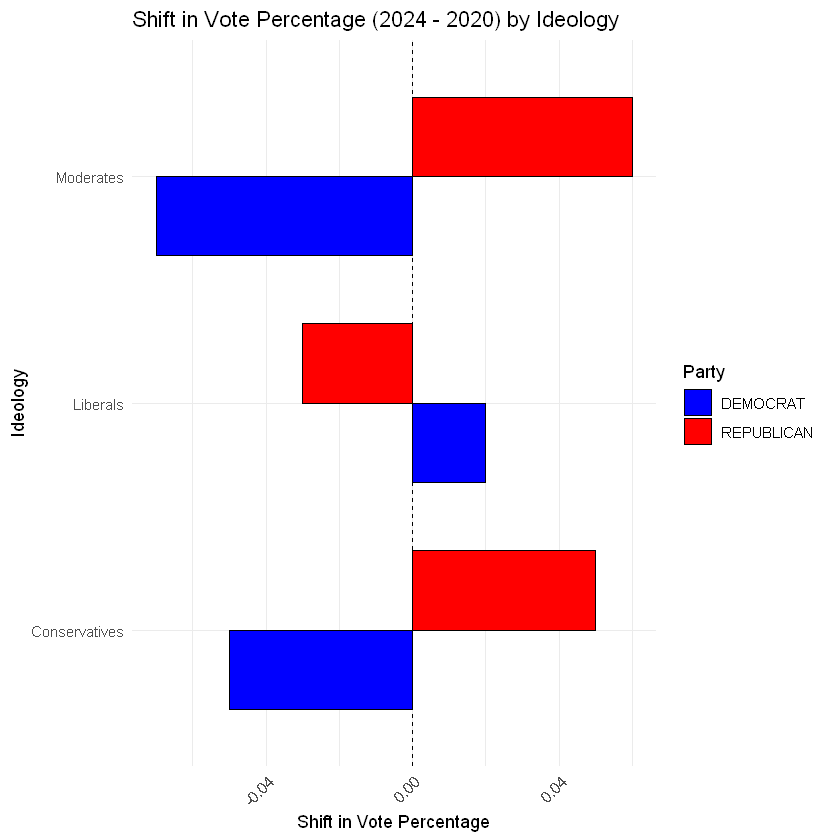

In [1182]:
print(data_list[["Ideology"]])  # Dataframe
print(plot_list[["Ideology"]])  # Plot

#### 3.2.2 How did Democratic and Republican vote percentages change by Gender from 2020 to 2024?

This analysis will examine shifts in vote percentages for the Democratic and Republican parties across different gender groups.
We calculate the change in vote percentages by gender and identify whether there was an increase or decrease in support for each party.

# A tibble: 4 x 6
  category `Demographic subgroup` party_simplified `2020` `2024`   shift
  <fct>    <chr>                  <chr>             <dbl>  <dbl>   <dbl>
1 Gender   Men                    DEMOCRAT           0.45   0.42 -0.0300
2 Gender   Men                    REPUBLICAN         0.53   0.55  0.0200
3 Gender   Women                  DEMOCRAT           0.57   0.53 -0.0400
4 Gender   Women                  REPUBLICAN         0.42   0.45  0.0300


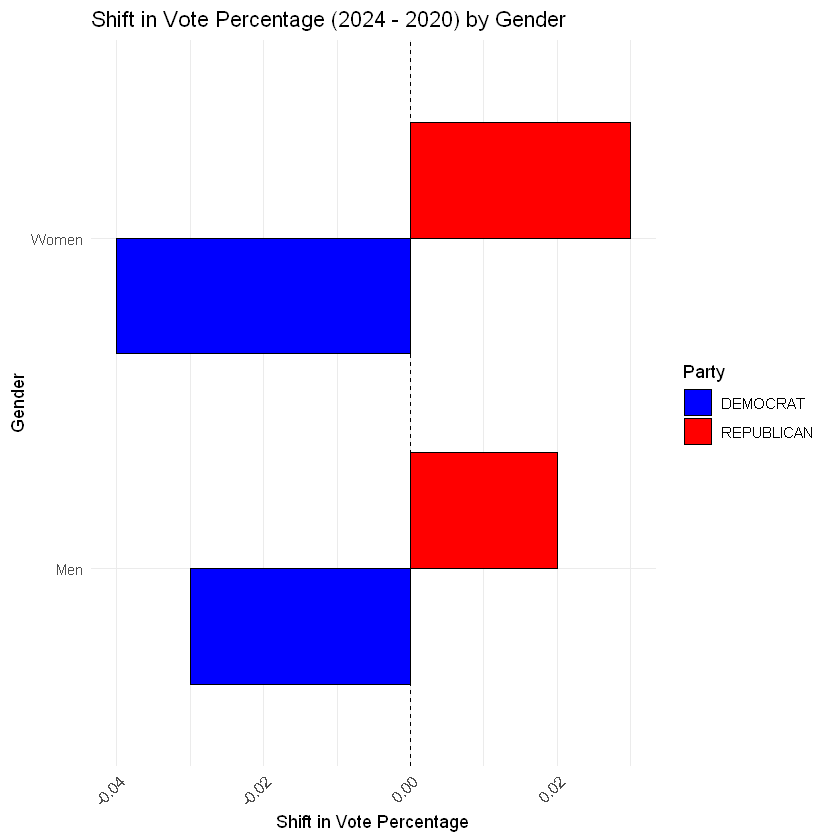

In [1186]:
print(data_list[["Gender"]])  # Dataframe
print(plot_list[["Gender"]])  # Plot

#### 3.2.3 How did the Democratic and Republican vote percentages change by gender and marital status from 2020 to 2024?

This question investigates how marital status influences voting behavior within gender groups and tracks changes between 2020 and 2024.
The result will highlight demographic shifts in vote preferences based on gender and marital status combinations (e.g., married men, single women).

# A tibble: 8 x 6
  category         `Demographic subgroup` party_simplified `2020` `2024`   shift
  <fct>            <chr>                  <chr>             <dbl>  <dbl>   <dbl>
1 Gender by marit~ Married men            DEMOCRAT           0.43   0.38 -0.05  
2 Gender by marit~ Married men            REPUBLICAN         0.55   0.6   0.0500
3 Gender by marit~ Married women          DEMOCRAT           0.48   0.48  0     
4 Gender by marit~ Married women          REPUBLICAN         0.51   0.51  0     
5 Gender by marit~ Unmarried men          DEMOCRAT           0.52   0.47 -0.0500
6 Gender by marit~ Unmarried men          REPUBLICAN         0.45   0.49  0.0400
7 Gender by marit~ Unmarried women        DEMOCRAT           0.62   0.59 -0.0300
8 Gender by marit~ Unmarried women        REPUBLICAN         0.36   0.38  0.0200


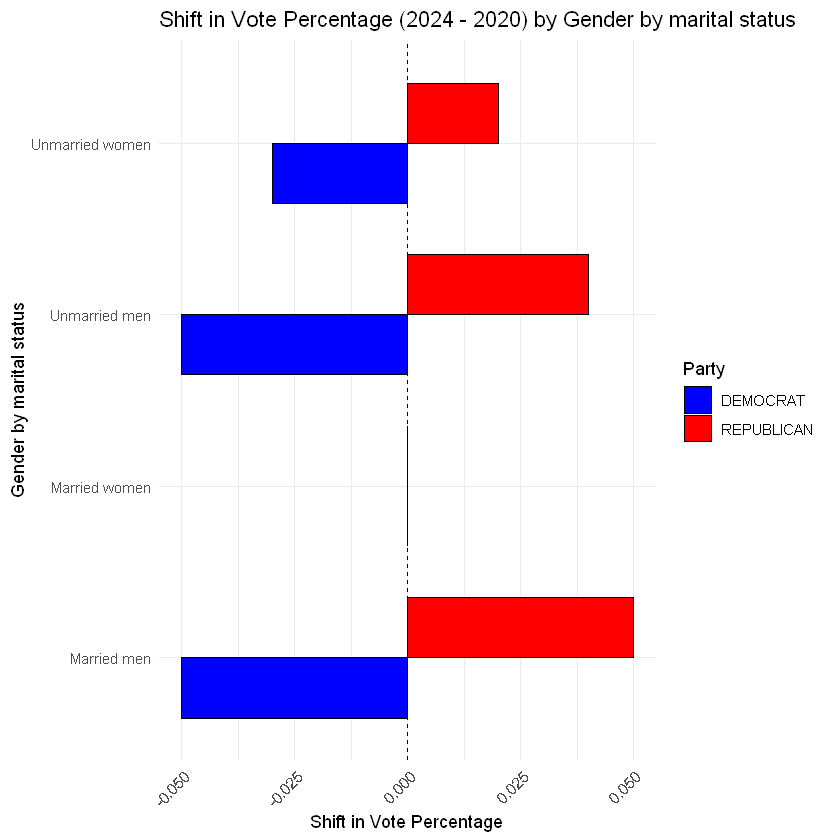

In [1190]:
print(data_list[["Gender by marital status"]])  # Dataframe
print(plot_list[["Gender by marital status"]])  # Plot

#### 3.2.4 How did the Democratic and Republican vote percentages change by religion from 2020 to 2024?

Religion often influences political preferences. This analysis tracks the changes in party support across different religious groups. The visualization will show which religious groups increased or decreased their support for each party.

# A tibble: 10 x 6
   category `Demographic subgroup`     party_simplified `2020` `2024`   shift
   <fct>    <chr>                      <chr>             <dbl>  <dbl>   <dbl>
 1 Religion Catholic                   DEMOCRAT           0.52   0.4  -0.12  
 2 Religion Catholic                   REPUBLICAN         0.47   0.58  0.11  
 3 Religion Jewish                     DEMOCRAT           0.76   0.78  0.0200
 4 Religion Jewish                     REPUBLICAN         0.22   0.22  0     
 5 Religion No religious affiliation   DEMOCRAT           0.65   0.71  0.0600
 6 Religion No religious affiliation   REPUBLICAN         0.31   0.26 -0.05  
 7 Religion Other religion             DEMOCRAT           0.68   0.59 -0.0900
 8 Religion Other religion             REPUBLICAN         0.29   0.34  0.0500
 9 Religion Protestant/Other Christian DEMOCRAT           0.39   0.36 -0.0300
10 Religion Protestant/Other Christian REPUBLICAN         0.6    0.63  0.0300


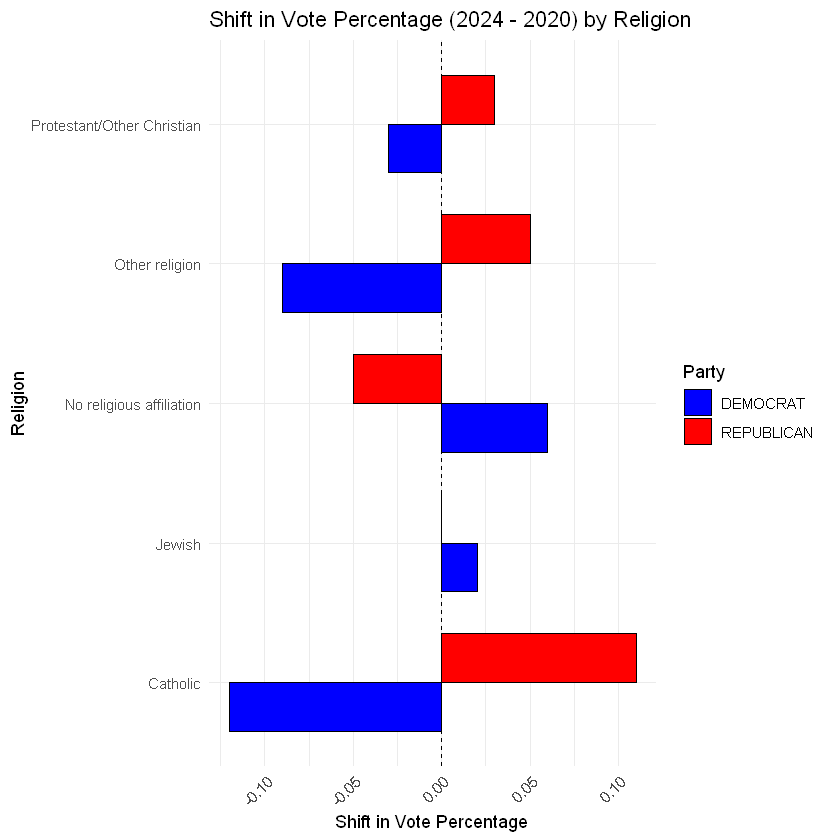

In [1194]:
print(data_list[["Religion"]])  # Dataframe
print(plot_list[["Religion"]])  # Plot

#### 3.2.5 How did the Democratic and Republican vote percentages change by age group from 2020 to 2024?

Age is a crucial factor in voting trends. This analysis will focus on changes in vote percentages across different age groups. 
It will identify which age groups shifted toward or away from each party.

# A tibble: 12 x 6
   category `Demographic subgroup` party_simplified `2020` `2024`   shift
   <fct>    <chr>                  <chr>             <dbl>  <dbl>   <dbl>
 1 Age      18–24 years old        DEMOCRAT           0.65   0.54 -0.11  
 2 Age      18–24 years old        REPUBLICAN         0.31   0.42  0.11  
 3 Age      25–29 years old        DEMOCRAT           0.54   0.53 -0.0100
 4 Age      25–29 years old        REPUBLICAN         0.43   0.45  0.0200
 5 Age      30–39 years old        DEMOCRAT           0.51   0.5  -0.0100
 6 Age      30–39 years old        REPUBLICAN         0.46   0.46  0     
 7 Age      40–49 years old        DEMOCRAT           0.54   0.48 -0.0600
 8 Age      40–49 years old        REPUBLICAN         0.44   0.5   0.06  
 9 Age      50–64 years old        DEMOCRAT           0.47   0.43 -0.0400
10 Age      50–64 years old        REPUBLICAN         0.52   0.56  0.0400
11 Age      65 and older           DEMOCRAT           0.47   0.49  0.0200
12 Age      65 and 

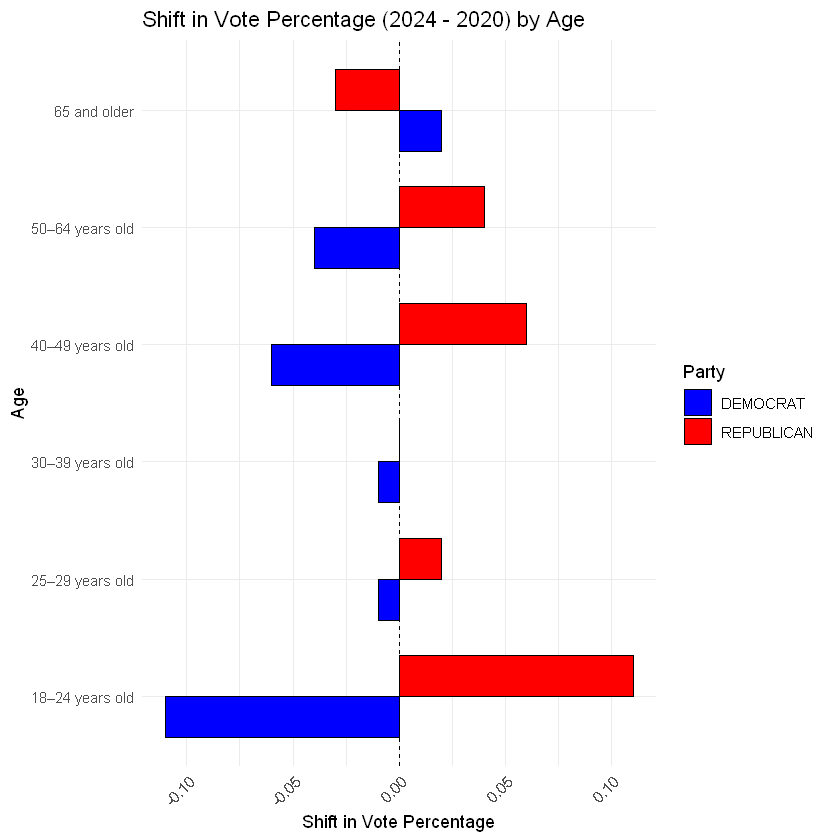

In [1198]:
print(data_list[["Age"]])  # Dataframe
print(plot_list[["Age"]])  # Plot

#### 3.2.6 How did the Democratic and Republican vote percentages change by education level from 2020 to 2024?

Education level can influence political ideology. This analysis looks at shifts in vote percentages based on educational attainment.
The analysis will reveal which education levels showed increased support for each party.

# A tibble: 10 x 6
   category  `Demographic subgroup` party_simplified `2020` `2024`   shift
   <fct>     <chr>                  <chr>             <dbl>  <dbl>   <dbl>
 1 Education Associate degree       DEMOCRAT           0.47   0.41 -0.06  
 2 Education Associate degree       REPUBLICAN         0.5    0.56  0.0600
 3 Education Bachelor's degree      DEMOCRAT           0.51   0.53  0.0200
 4 Education Bachelor's degree      REPUBLICAN         0.47   0.45 -0.0200
 5 Education High school or less    DEMOCRAT           0.46   0.35 -0.11  
 6 Education High school or less    REPUBLICAN         0.54   0.63  0.09  
 7 Education Postgraduate degree    DEMOCRAT           0.62   0.59 -0.0300
 8 Education Postgraduate degree    REPUBLICAN         0.37   0.38  0.0100
 9 Education Some college education DEMOCRAT           0.51   0.47 -0.0400
10 Education Some college education REPUBLICAN         0.47   0.51  0.0400


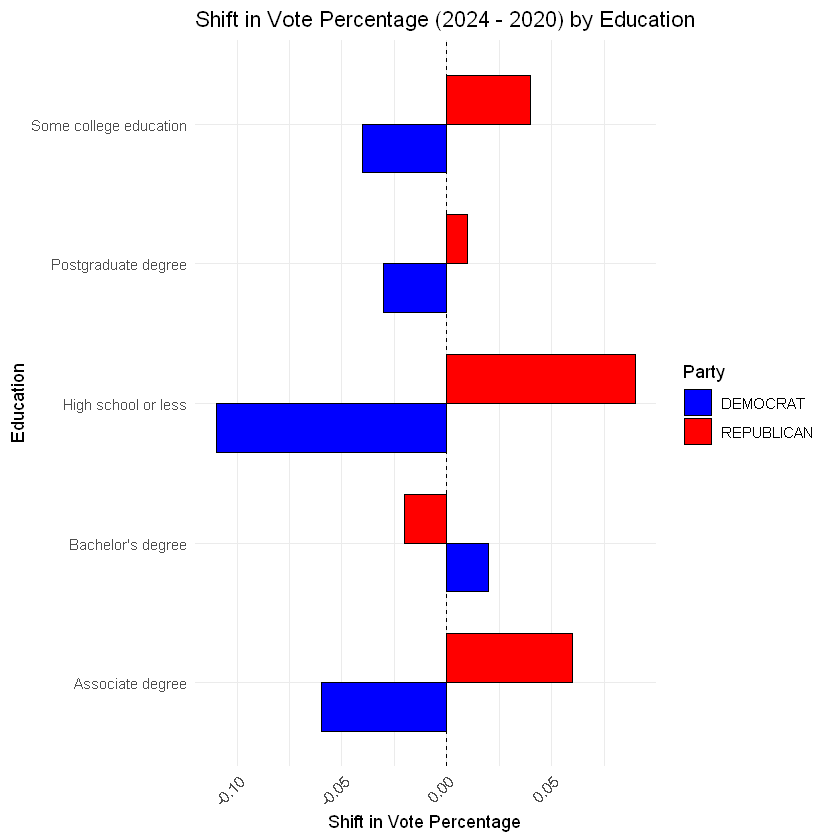

In [1202]:
print(data_list[["Education"]])  # Dataframe
print(plot_list[["Education"]])  # Plot

#### 3.2.7 How did the Democratic and Republican vote percentages change by income level from 2020 to 2024?

Income levels often correlate with political preferences. This analysis tracks changes in vote percentages across income brackets.
The results will show shifts in voting patterns based on income, highlighting the economic factors driving political support.

# A tibble: 10 x 6
   category `Demographic subgroup` party_simplified `2020` `2024`   shift
   <fct>    <fct>                  <chr>             <dbl>  <dbl>   <dbl>
 1 Income   $100,000–199,999       DEMOCRAT           0.41   0.51  0.1   
 2 Income   $100,000–199,999       REPUBLICAN         0.57   0.47 -0.1   
 3 Income   $30,000–49,999         DEMOCRAT           0.56   0.45 -0.11  
 4 Income   $30,000–49,999         REPUBLICAN         0.44   0.53  0.09  
 5 Income   $50,000–99,999         DEMOCRAT           0.56   0.46 -0.1   
 6 Income   $50,000–99,999         REPUBLICAN         0.42   0.51  0.09  
 7 Income   Over $200,000          DEMOCRAT           0.48   0.51  0.0300
 8 Income   Over $200,000          REPUBLICAN         0.48   0.45 -0.0300
 9 Income   Under $30,000          DEMOCRAT           0.54   0.5  -0.0400
10 Income   Under $30,000          REPUBLICAN         0.46   0.46  0     


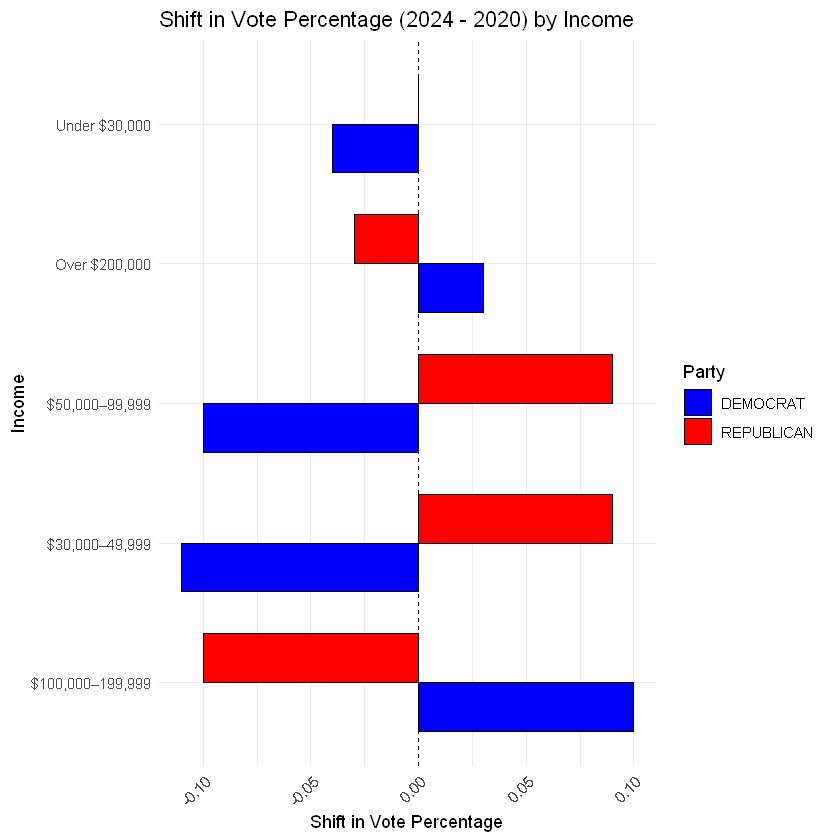

In [1295]:
print(data_list[["Income"]])  # Dataframe
print(plot_list[["Income"]])  # Plot

In [1291]:
str(data_list[["Income"]])

tibble [10 x 6] (S3: tbl_df/tbl/data.frame)
 $ category            : Factor w/ 9 levels "Ideology","Gender",..: 7 7 7 7 7 7 7 7 7 7
 $ Demographic subgroup: Factor w/ 5 levels "Under $30,000",..: 4 4 2 2 3 3 5 5 1 1
 $ party_simplified    : chr [1:10] "DEMOCRAT" "REPUBLICAN" "DEMOCRAT" "REPUBLICAN" ...
 $ 2020                : num [1:10] 0.41 0.57 0.56 0.44 0.56 0.42 0.48 0.48 0.54 0.46
 $ 2024                : num [1:10] 0.51 0.47 0.45 0.53 0.46 0.51 0.51 0.45 0.5 0.46
 $ shift               : num [1:10] 0.1 -0.1 -0.11 0.09 -0.1 ...


#### 3.2.8 How did the Democratic and Republican vote percentages change by area type (urban, suburban, rural) from 2020 to 2024?

Area type can influence political behavior. This analysis examines changes in vote percentages across urban, suburban, and rural areas.
It will highlight geographical trends and shifts in party support.

# A tibble: 6 x 6
  category  `Demographic subgroup` party_simplified `2020` `2024`   shift
  <fct>     <chr>                  <chr>             <dbl>  <dbl>   <dbl>
1 Area type Rural                  DEMOCRAT           0.42   0.34 -0.0800
2 Area type Rural                  REPUBLICAN         0.57   0.64  0.0700
3 Area type Suburban               DEMOCRAT           0.5    0.47 -0.0300
4 Area type Suburban               REPUBLICAN         0.48   0.51  0.0300
5 Area type Urban                  DEMOCRAT           0.6    0.59 -0.0100
6 Area type Urban                  REPUBLICAN         0.38   0.38  0     


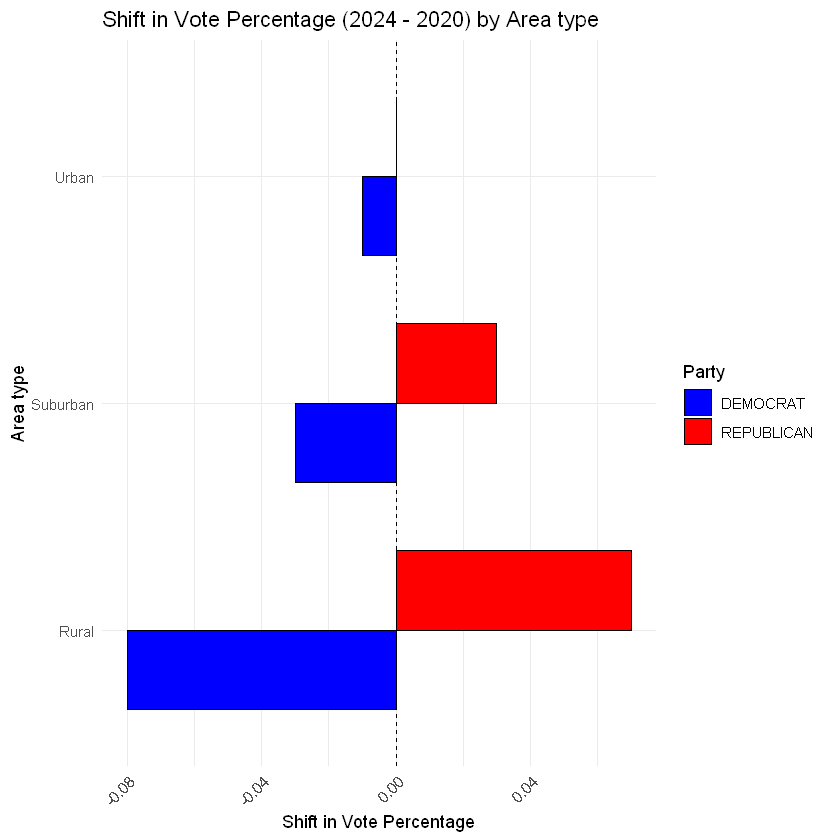

In [1148]:
print(data_list[["Area type"]])  # Dataframe
print(plot_list[["Area type"]])  # Plot

#### 3.2.9 How did the Democratic and Republican vote percentages change by opinion on abortion from 2020 to 2024?

Abortion is a key issue in elections. This analysis tracks vote percentage changes for each party based on public opinion on abortion rights.
The analysis will show how positions on abortion influenced shifts in voting behavior for Democrats and Republicans.

# A tibble: 4 x 6
  category         `Demographic subgroup` party_simplified `2020` `2024`   shift
  <fct>            <chr>                  <chr>             <dbl>  <dbl>   <dbl>
1 Abortion should~ Illegal in all/most c~ DEMOCRAT           0.23   0.09 -0.14  
2 Abortion should~ Illegal in all/most c~ REPUBLICAN         0.76   0.9   0.14  
3 Abortion should~ Legal in all/most cas~ DEMOCRAT           0.74   0.68 -0.0600
4 Abortion should~ Legal in all/most cas~ REPUBLICAN         0.24   0.3   0.06  


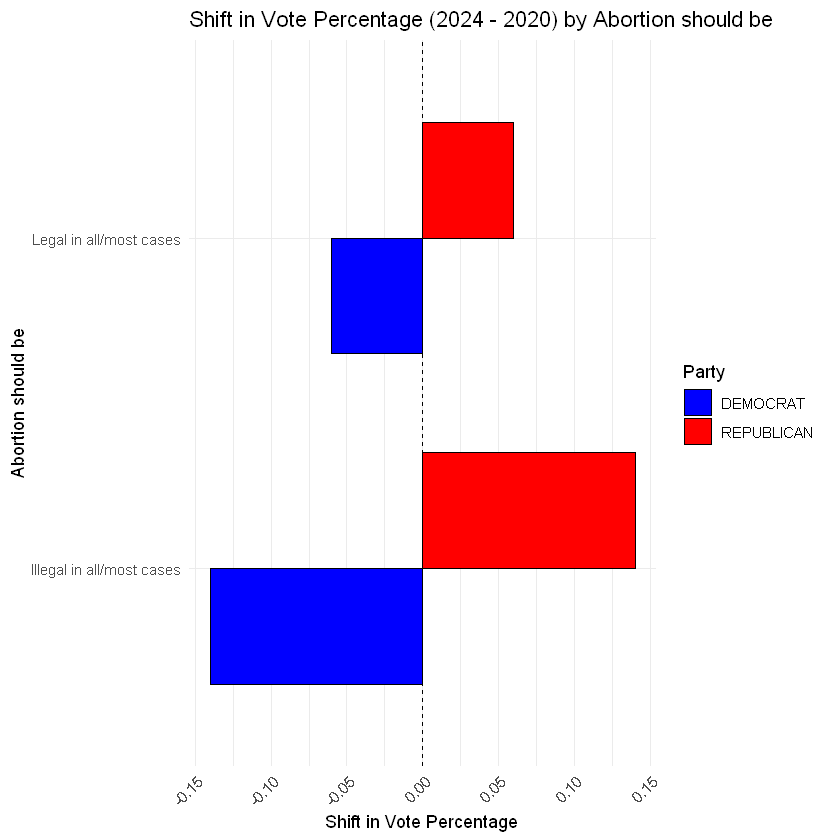

In [1152]:
print(data_list[["Abortion should be"]])  # Dataframe
print(plot_list[["Abortion should be"]])  # Plot

In the 2024 election, we observe notable shifts in voting patterns related to the abortion issue. Specifically, Democrats experienced a decrease in support from voters who consider abortion should be legal in all/most cases, despite abortion being a central issue in their campaign. This could suggest that some voters saw the Democratic stance as overly extreme or that they prioritized other issues more strongly. Additionally, Republicans gained support in both the pro-abortion and anti-abortion groups, reflecting their broader messaging on law and order, and suggesting a possible realignment of voters based on factors beyond abortion rights alone.

These trends suggest that in 2024, Democratic support was affected by a perception of extremism on abortion policy, while Republicans successfully attracted voters with a more moderate stance on the issue. As we further analyze this shift, it becomes clear that the voter base was more diverse in their concerns than just abortion alone, highlighting the complexity of election dynamics in the modern political landscape.

### 3.3 States level analysis

In [1314]:
# Inspect column names to ensure correct mapping
colnames(final_merged_data_with_demo_national)

[1] "year"                 "party_simplified"     "candidatevotes"      
 [4] "totalvotes"           "VAP"                  "VEP"                 
 [7] "Turnout"              "Turnout_Percent_VAP"  "Turnout_Percent_VEP" 
[10] "state"                "category"             "Demographic subgroup"
[13] "% oftotal vote"       "vote_percentage"

In [1413]:
# Filter data to exclude 'NATIONAL' and keep only states
state_data <- final_merged_data_with_demo_national %>%
  filter(state != "NATIONAL")  # Exclude national-level data

# Drop unnecessary columns to focus only on relevant ones
state_data_cleaned <- state_data %>%
  select(year, party_simplified, candidatevotes, state)  # Only keep necessary columns

#head(state_data_cleaned)


#### 3.3.1 Which swing states experienced the most significant shifts in voter preferences?

This allows you to identify states where the vote percentage change between 2020 and 2024 was most dramatic, helping to pinpoint key battlegrounds. A historical trend visualization can show shifts over multiple elections.

In [1415]:
# Calculate vote percentage for each party (Democrat and Republican) in each state
state_votes <- state_data_cleaned %>%
  group_by(state, year, party_simplified) %>%
  summarise(total_votes = sum(candidatevotes, na.rm = TRUE), .groups = 'drop') %>%
  group_by(state, year) %>%
  mutate(total_state_votes = sum(total_votes)) %>%
  ungroup() %>%
  mutate(vote_percentage = total_votes / total_state_votes)  # Calculate vote percentage

# Remove any duplicate rows (after summarizing the data)
state_votes_cleaned <- state_votes %>%
  distinct(state, year, party_simplified, vote_percentage, .keep_all = TRUE)  # Keep unique combinations of state, year, and party

# Remove rows where vote_percentage is NaN (keeping other columns intact)
state_votes_cleaned <- state_votes %>%
  filter(!is.nan(vote_percentage))  # Keep rows where vote_percentage is not NaN

# View the cleaned data
#head(state_votes_cleaned, 50)
#tail(state_votes_cleaned, 50)

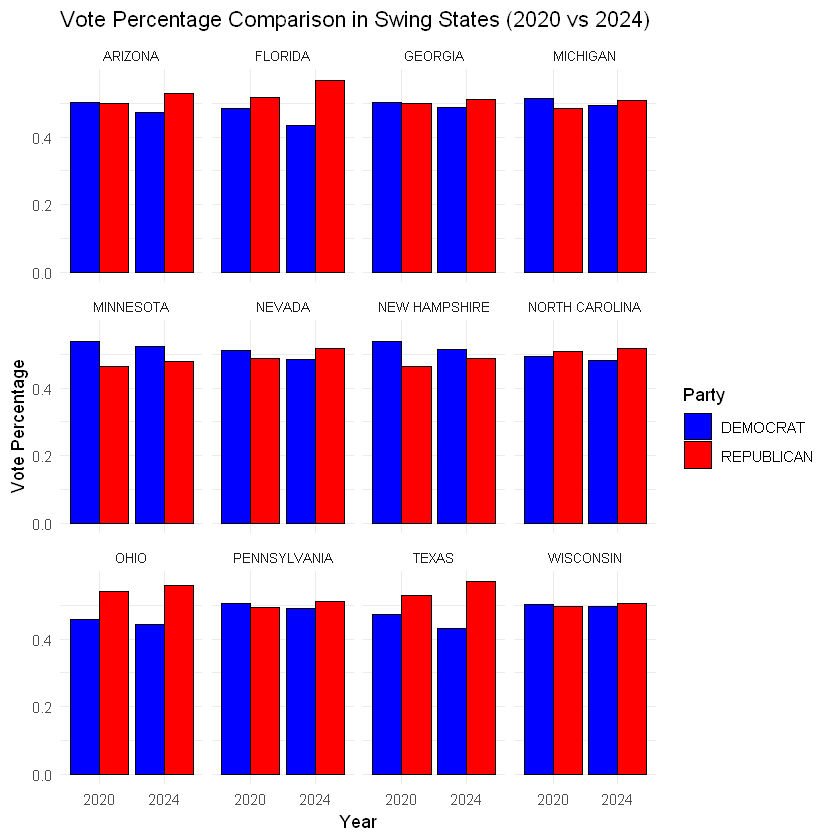

In [1411]:
# Define the list of historically swing states
swing_states_list <- c("ARIZONA", "GEORGIA", "MICHIGAN", "MINNESOTA", 
                       "NEVADA", "NEW HAMPSHIRE", "NORTH CAROLINA", 
                       "PENNSYLVANIA", "WISCONSIN", "FLORIDA", "OHIO", "TEXAS")

# Filter data to focus on the swing states and only 2020 and 2024 years
state_vote_comparison <- state_votes_cleaned %>%
  filter(state %in% swing_states_list) %>%
  filter(year %in% c(2020, 2024))  # Filter only 2020 and 2024 years

# Create the bar plot for each state showing both Democrat and Republican votes for 2020 and 2024
ggplot(state_vote_comparison, aes(x = factor(year), y = vote_percentage, fill = party_simplified)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +  # Create bars for each party
  facet_wrap(~ state, scales = "fixed") +  # Facet by state, fixed y-axis scale
  scale_fill_manual(values = c("DEMOCRAT" = "blue", "REPUBLICAN" = "red")) +  # Set colors for each party
  labs(
    title = "Vote Percentage Comparison in Swing States (2020 vs 2024)",
    x = "Year",
    y = "Vote Percentage",
    fill = "Party"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5), 
    strip.text = element_text(size = 8)  # Make state names smaller
  )

## 4. Conclusion

This project explored historical U.S. presidential elections, combining multiple datasets to uncover patterns in voter turnout, demographics, and election outcomes.

The analysis highlighted key trends over time and differences between states, while making use of data cleaning, transformation, and visualization to present the information clearly.

The work, overall,  provides a structured and accessible view of election data, emphasizing patterns and insights rather than individual results.